# Problem Statement
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
cmpny=pd.read_csv("Company_Data.csv")
cmpny

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
# EDA
cmpny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cmpny.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
cmpny.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [6]:
cmpny["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [7]:
cmpny["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
cmpny["US"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
cmpny.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
cmpny["ShelveLoc"]=cmpny["ShelveLoc"].astype("category")
cmpny["Urban"]=cmpny["Urban"].astype("category")
cmpny["US"]=cmpny["US"].astype("category")

In [11]:
cmpny.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [12]:
list(cmpny.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
cmpny['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [14]:
cmpny['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [15]:
cmpny['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [16]:
cmpny.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [17]:
cmpny.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [18]:
#Label Encoding

In [19]:
label_encoder = LabelEncoder()
cmpny['ShelveLoc']= label_encoder.fit_transform(cmpny['ShelveLoc']) 
cmpny['Urban']= label_encoder.fit_transform(cmpny['Urban'])
cmpny['US']= label_encoder.fit_transform(cmpny['US'])

In [20]:
cmpny['Sales'].mean()

7.496325

In [21]:
cmpny['High']=cmpny.Sales.map(lambda x: 1 if x >7.49 else 0)

In [22]:
cmpny.drop('Sales',inplace=True,axis=1)

In [23]:
cmpny.rename(columns={'High':'Sales'},inplace=True)

In [24]:
cmpny.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  Sales  
0         17      1   1      1  
1         10      1   1      1  
2         12      1   1      1  
3         14      1   1      0  
4         13      1   0      0

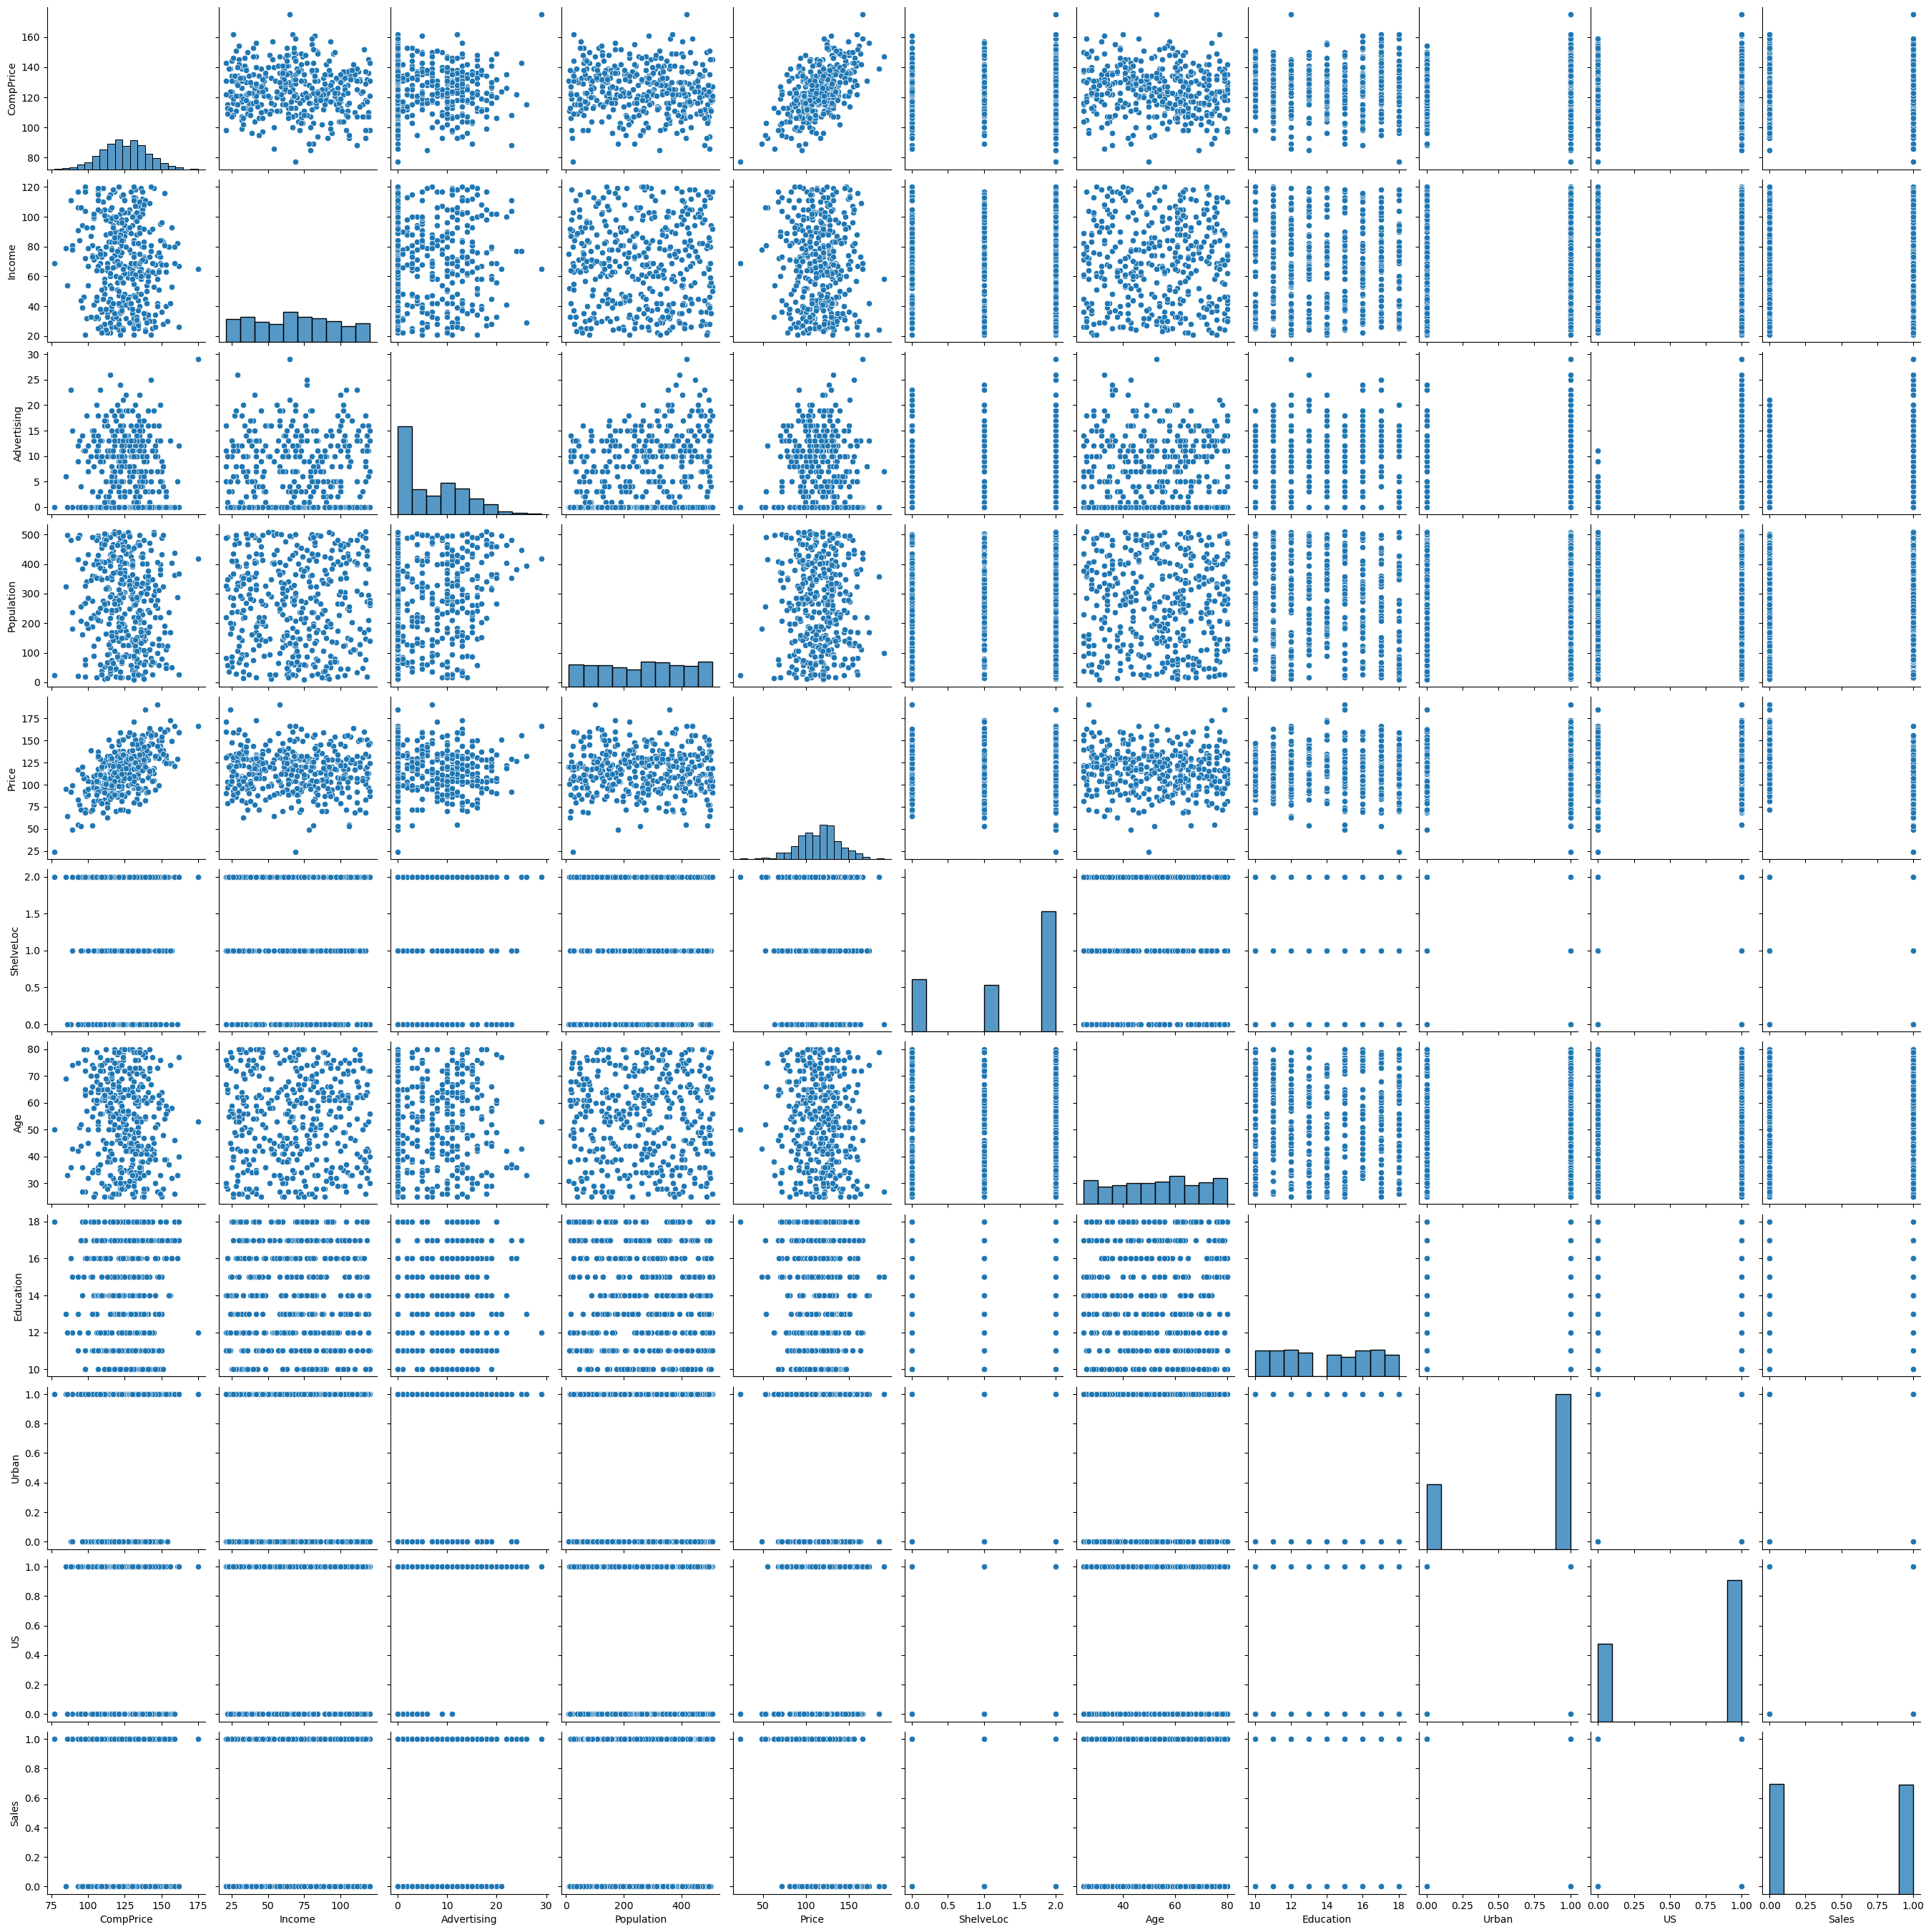

In [25]:
sns.pairplot(cmpny)

<AxesSubplot:>

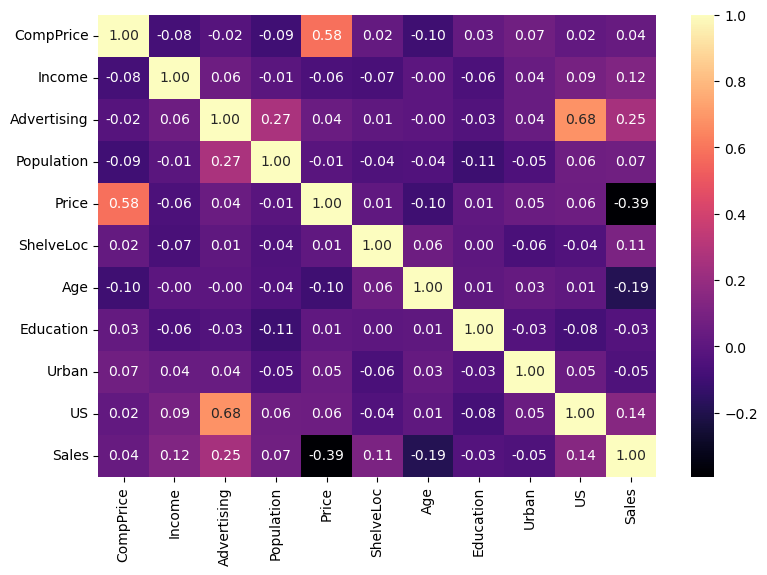

In [26]:
plt.figure(figsize = (9,6));
sns.heatmap(cmpny.corr(), cmap='magma', annot=True, fmt=".2f")

<AxesSubplot:>

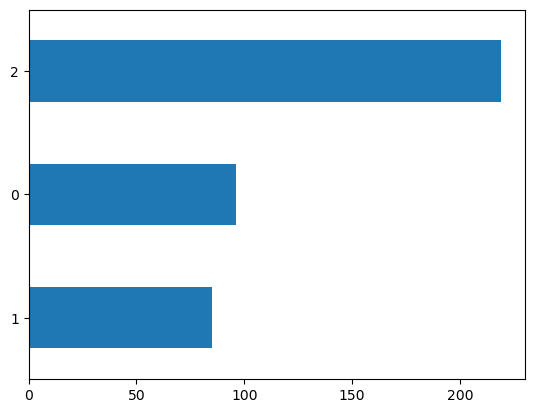

In [27]:
cmpny["ShelveLoc"].value_counts(ascending=True).plot(kind='barh')

In [28]:
x = cmpny.iloc[:,:-1]
y = cmpny['Sales']

In [29]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [30]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=3)

In [32]:
xtrain

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
239        123     105            0         149    118          0   62   
188        116      37            0         426     90          2   76   
240        159      80            0         362    121          2   26   
23         121      31            0         292    109          2   79   
343        117      42           10         371    121          0   26   
..         ...     ...          ...         ...    ...        ...  ...   
256        147      40            0         277    144          2   73   
131        108      69            3         208     94          2   77   
249        125      67            0          86    117          0   65   
152        128      78            0         341    128          1   45   
362        131      55            0          26    110          0   79   

     Education  Urban  US  
239         16      1   1  
188         15      1   0  
240         18      1   0  
23          10      1   0  
343         14      1   1  
..         ...    ...  ..  
256         10      1   0  
131         16      1   0  
249         11      1   0  
152         13      0   0  
362         12      1   1  

[320 rows x 10 columns]

In [33]:
xtest

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
376        141      60           19         319     92          1   44   
16         118      32            0         284    110          1   63   
365        154      30            0         122    162          2   57   
82         151      83            4         325    139          1   28   
107        134     107            0         104    108          2   60   
..         ...     ...          ...         ...    ...        ...  ...   
246        120      56           20         266     90          0   78   
10         121      78            9         150    100          0   26   
115        139      35            0          95    129          2   42   
74         150      68            5         125    136          2   64   
194        112      98           18         481    128          2   45   

     Education  Urban  US  
376         11      1   1  
16          13      1   0  
365         17      0   0  
82          17      1   1  
107         12      1   0  
..         ...    ...  ..  
246         18      1   1  
10          10      0   1  
115         13      1   0  
74          13      0   1  
194         11      1   1  

[80 rows x 10 columns]

In [34]:
#DecisionTreeClassifier Using Gini Criteria

In [35]:
classifier =DecisionTreeClassifier(criterion='gini',splitter='best')

In [36]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [37]:
y_pred=classifier.predict(xtest)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [38]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.81      0.74      0.77        39

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [39]:
#DecisionTreeClassifier Using Entropy Criteria

In [40]:
parameter={
 'criterion':['entropy','gini'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12,15,18]
    
}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5)

In [42]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15,
                                       18],
                         'splitter': ['best', 'random']})

In [43]:
ypred=grid.predict(xtest)

In [44]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

In [45]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='random',random_state=42)

In [46]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.84      0.79      0.82        39

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80



In [47]:
print("Training Accuracy:", dt.score(xtrain,ytrain))
print("Testing Accuracy:" ,dt.score(xtest,ytest))

Training Accuracy: 0.828125
Testing Accuracy: 0.825


In [48]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

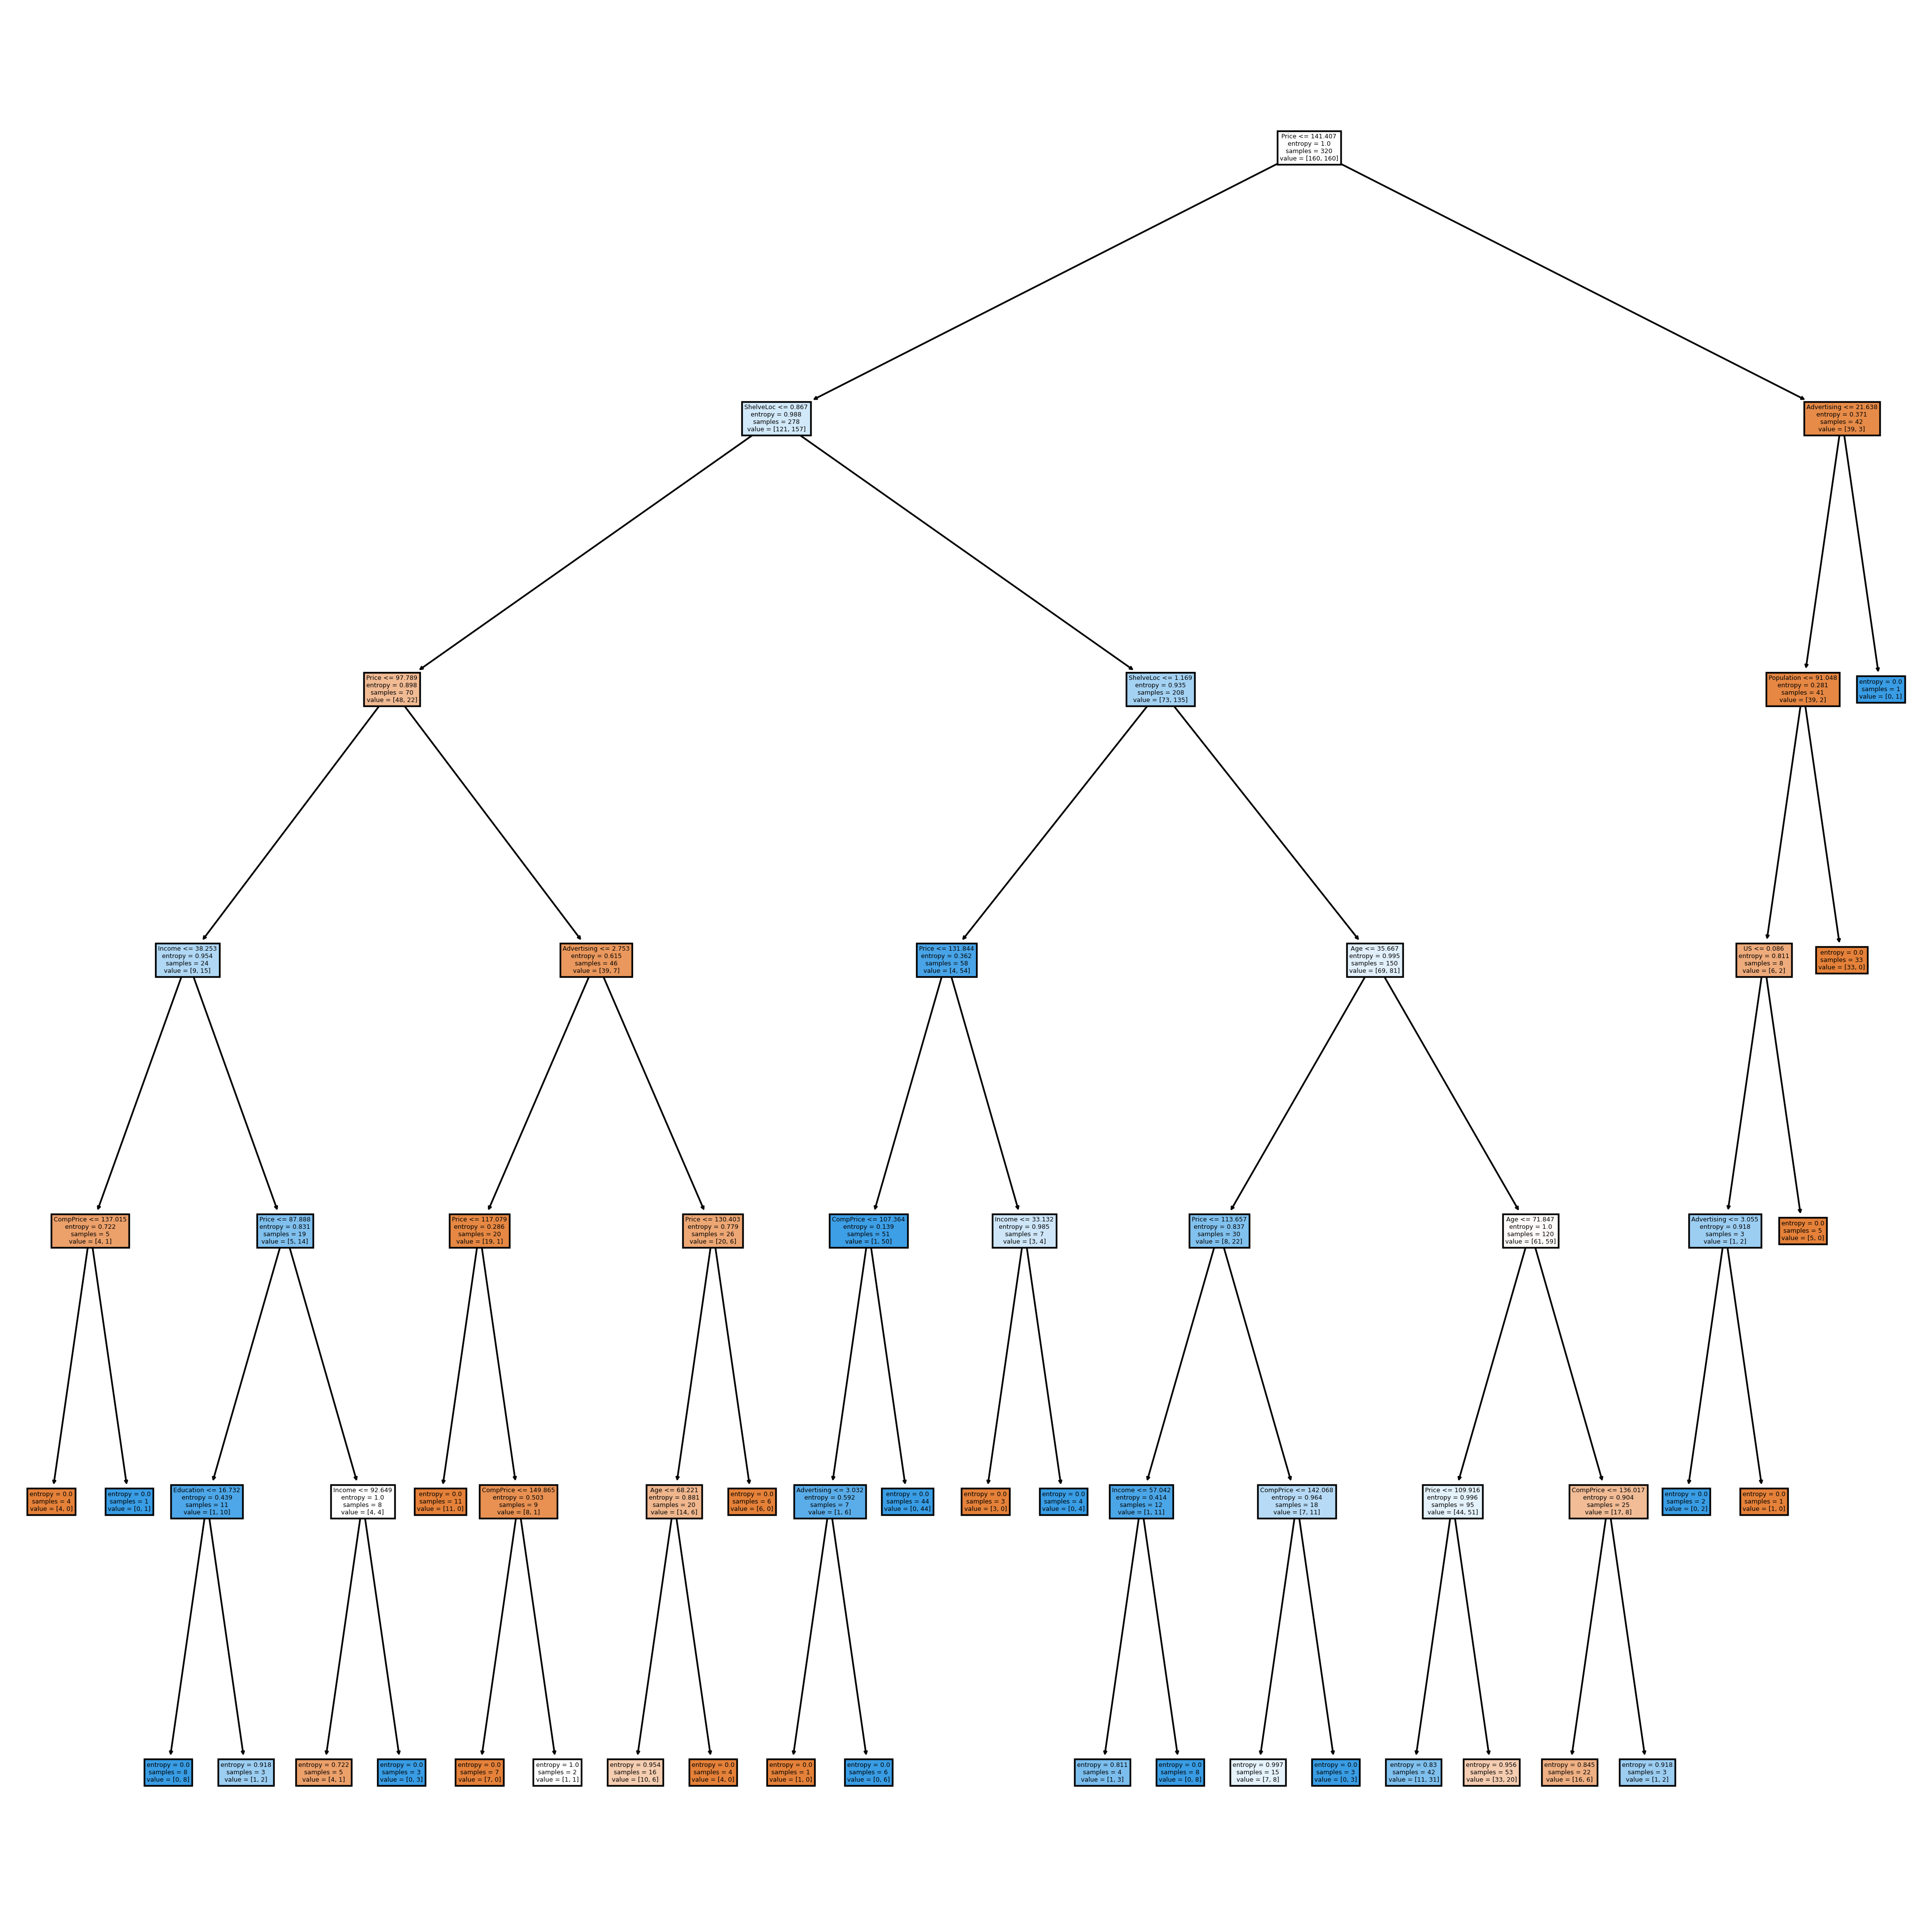

In [49]:
tree.plot_tree(dt, feature_names=x.columns,filled=True)
plt.show()

# Problem Statement
Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [51]:
fraudC=pd.read_csv("Fraud_check.csv")
fraudC

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [52]:
fraudC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [53]:
fraudC.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [54]:
fraudC.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [55]:
fraudC.duplicated().value_counts()

False    600
dtype: int64

In [56]:
fraudC["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [57]:
fraudC["Urban"].unique()

array(['YES', 'NO'], dtype=object)

In [58]:
fraudC["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [59]:
list(fraudC.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [60]:
fraudC.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [61]:
y1=np.empty(600, dtype=object)
i=0

for value in fraudC['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1   

In [62]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [63]:
f_t=pd.DataFrame(y1,columns=["Target"])
f_t

Target
0     Good
1     Good
2     Good
3     Good
4     Good
..     ...
595   Good
596   Good
597   Good
598   Good
599   Good

[600 rows x 1 columns]

In [64]:
fraudC=pd.concat([fraudC,f_t],axis=1)
fraudC

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban Target  
0                 10   YES   Good  
1                 18   YES   Good  
2                 30   YES   Good  
3                 15   YES   Good  
4                 28    NO   Good  
..               ...   ...    ...  
595                7   YES   Good  
596                2   YES   Good  
597                0   YES   Good  
598               17    NO   Good  
599               16    NO   Good  

[600 rows x 7 columns]

In [65]:
fraudC.drop('Taxable.Income',inplace=True,axis=1)

In [66]:
fraudC.head()

Undergrad Marital.Status  City.Population  Work.Experience Urban Target
0        NO         Single            50047               10   YES   Good
1       YES       Divorced           134075               18   YES   Good
2        NO        Married           160205               30   YES   Good
3       YES         Single           193264               15   YES   Good
4        NO        Married            27533               28    NO   Good

In [67]:
fraudC['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [68]:
fraudC['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [69]:
fraudC['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [70]:
fraudC.groupby(['Urban', 'Target', 'Undergrad', 'Marital.Status']).count()

City.Population  Work.Experience
Urban Target Undergrad Marital.Status                                  
NO    Good   NO        Divorced                     43               43
                       Married                      37               37
                       Single                       34               34
             YES       Divorced                     41               41
                       Married                      37               37
                       Single                       45               45
      Risky  NO        Divorced                     10               10
                       Married                       7                7
                       Single                       12               12
             YES       Divorced                      9                9
                       Married                      13               13
                       Single                       10               10
YES   Good   NO        Divorced                     37               37
                       Married                      35               35
                       Single                       44               44
             YES       Divorced                     32               32
                       Married                      40               40
                       Single                       51               51
      Risky  NO        Divorced                      7                7
                       Married                      12               12
                       Single                       10               10
             YES       Divorced                     10               10
                       Married                      13               13
                       Single                       11               11

In [71]:
fraudC['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [72]:
en = LabelEncoder()
fraudC['Undergrad']= en.fit_transform(fraudC['Undergrad'])
fraudC['Marital.Status']= en.fit_transform(fraudC['Marital.Status'])
fraudC['Urban']= en.fit_transform(fraudC['Urban'])
fraudC['Target']= en.fit_transform(fraudC['Target'])

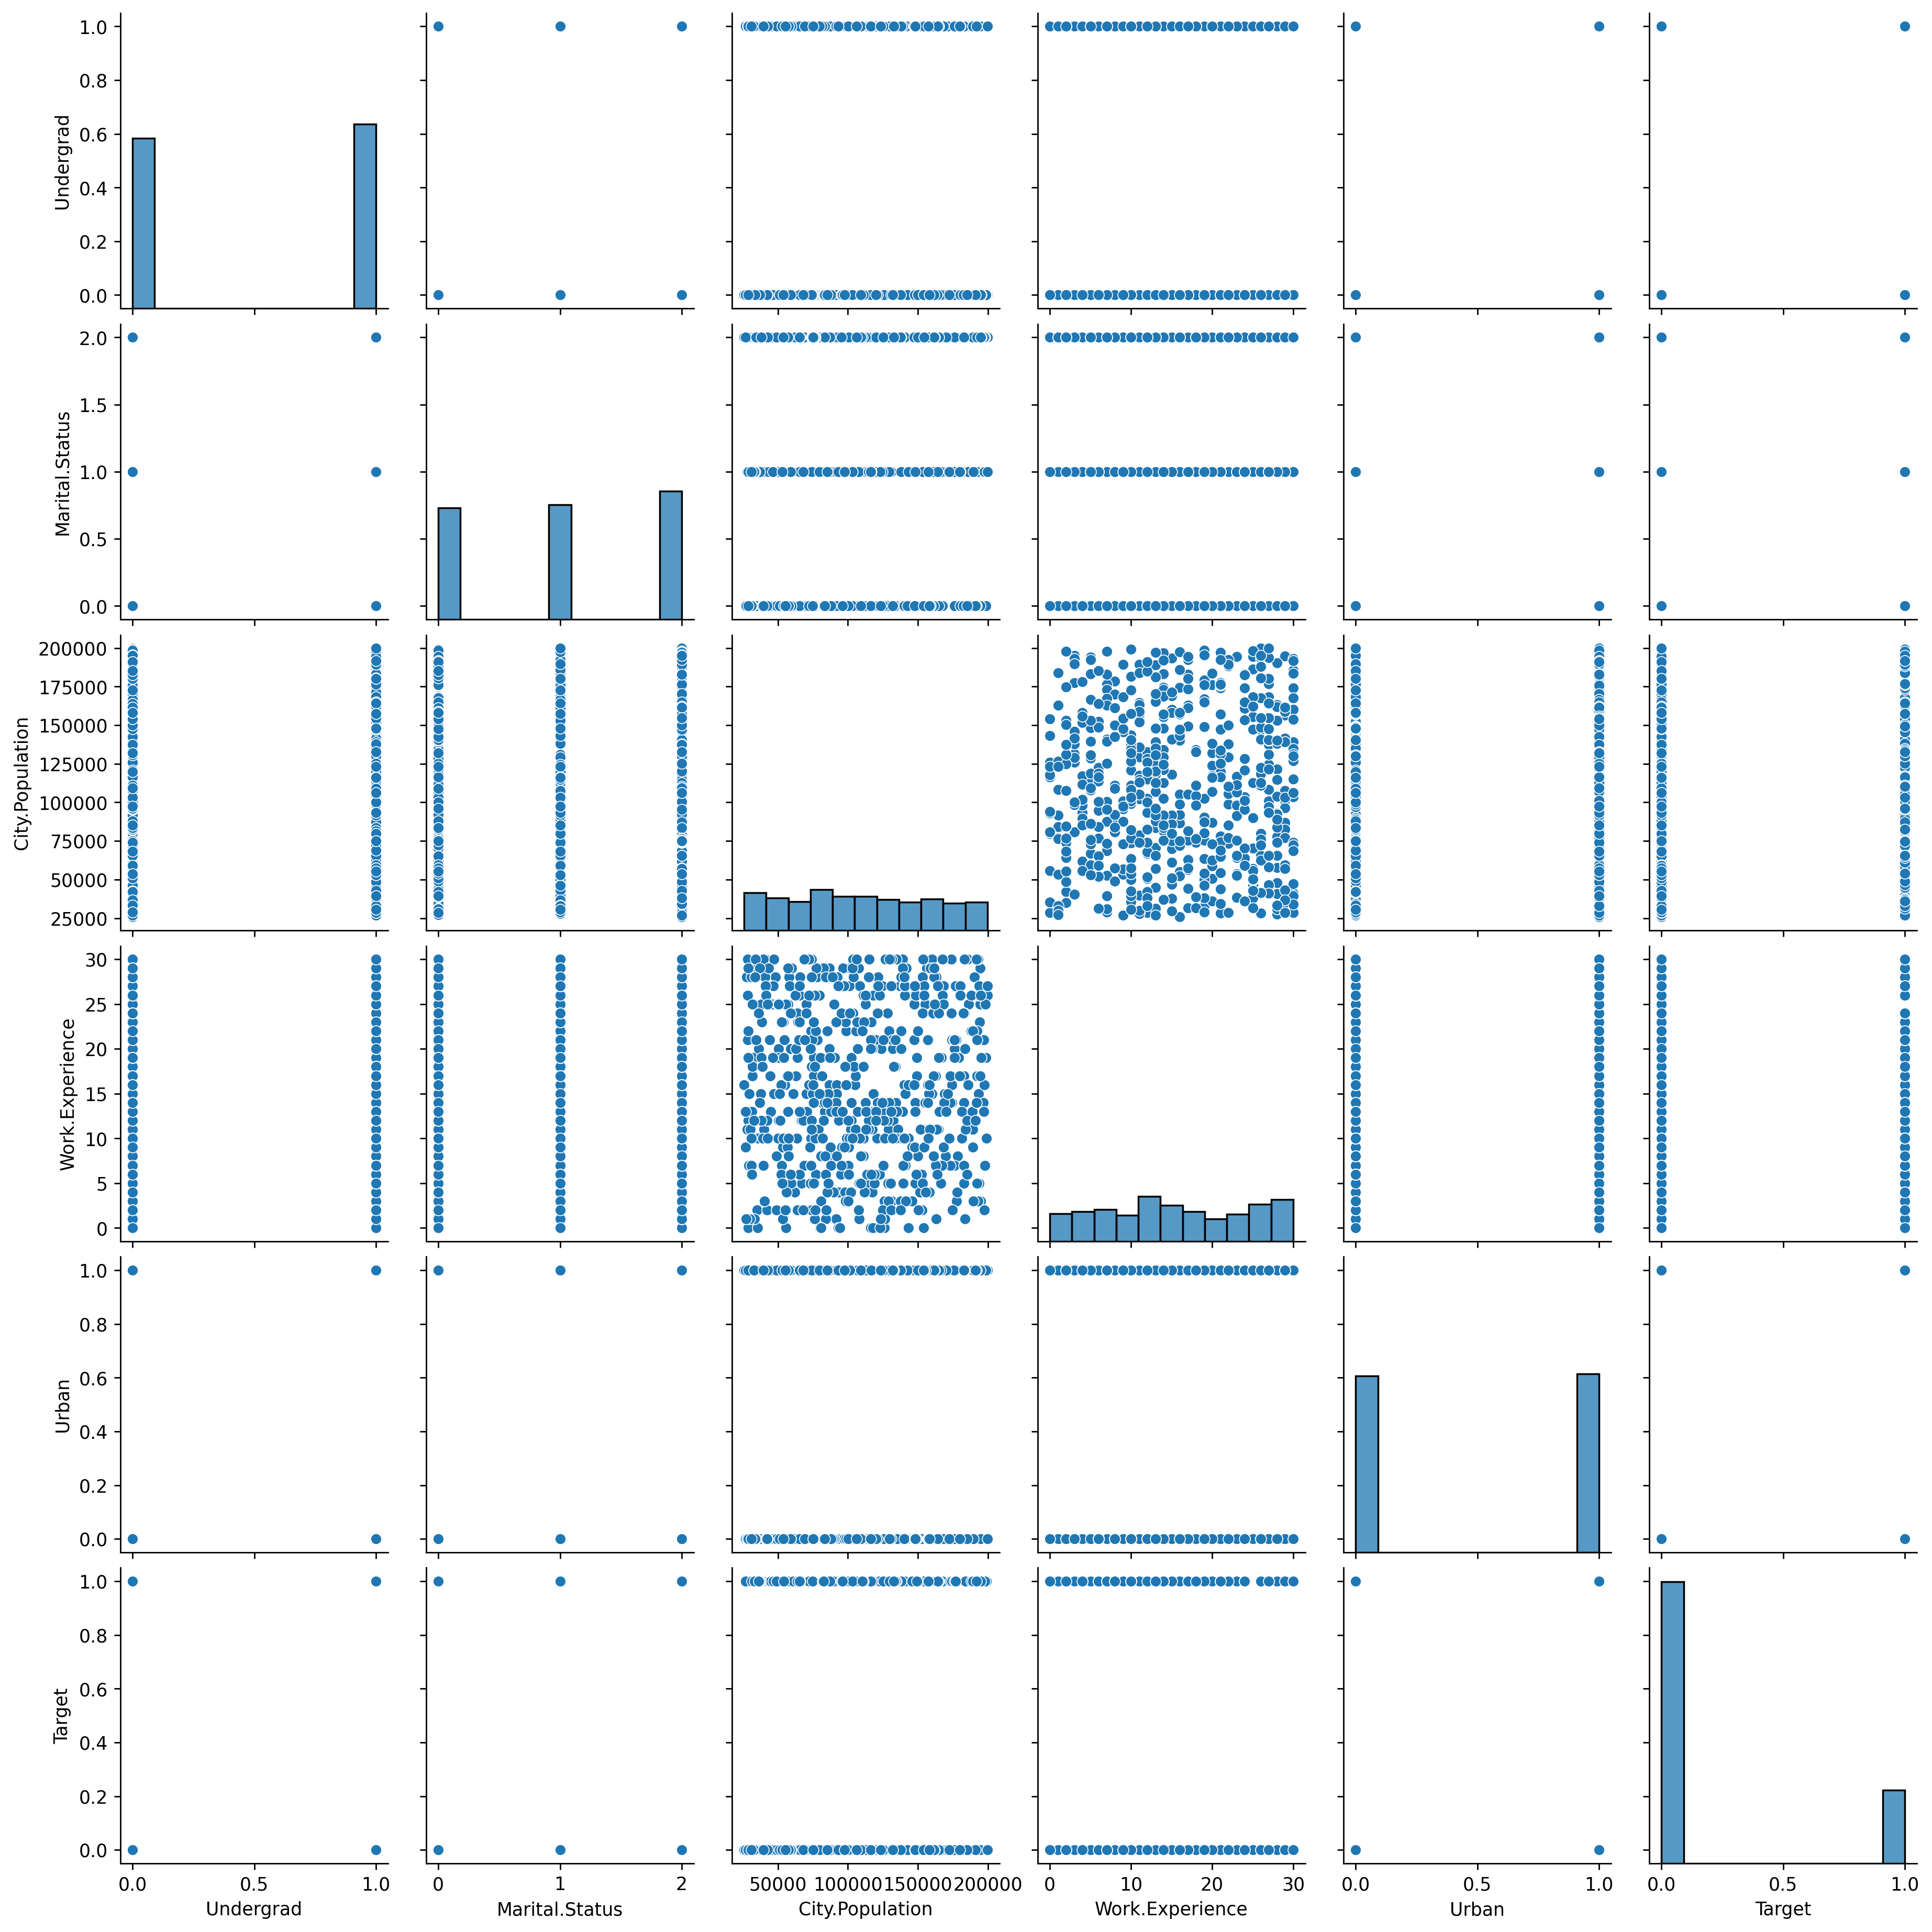

In [73]:
sns.pairplot(fraudC)

<AxesSubplot:>

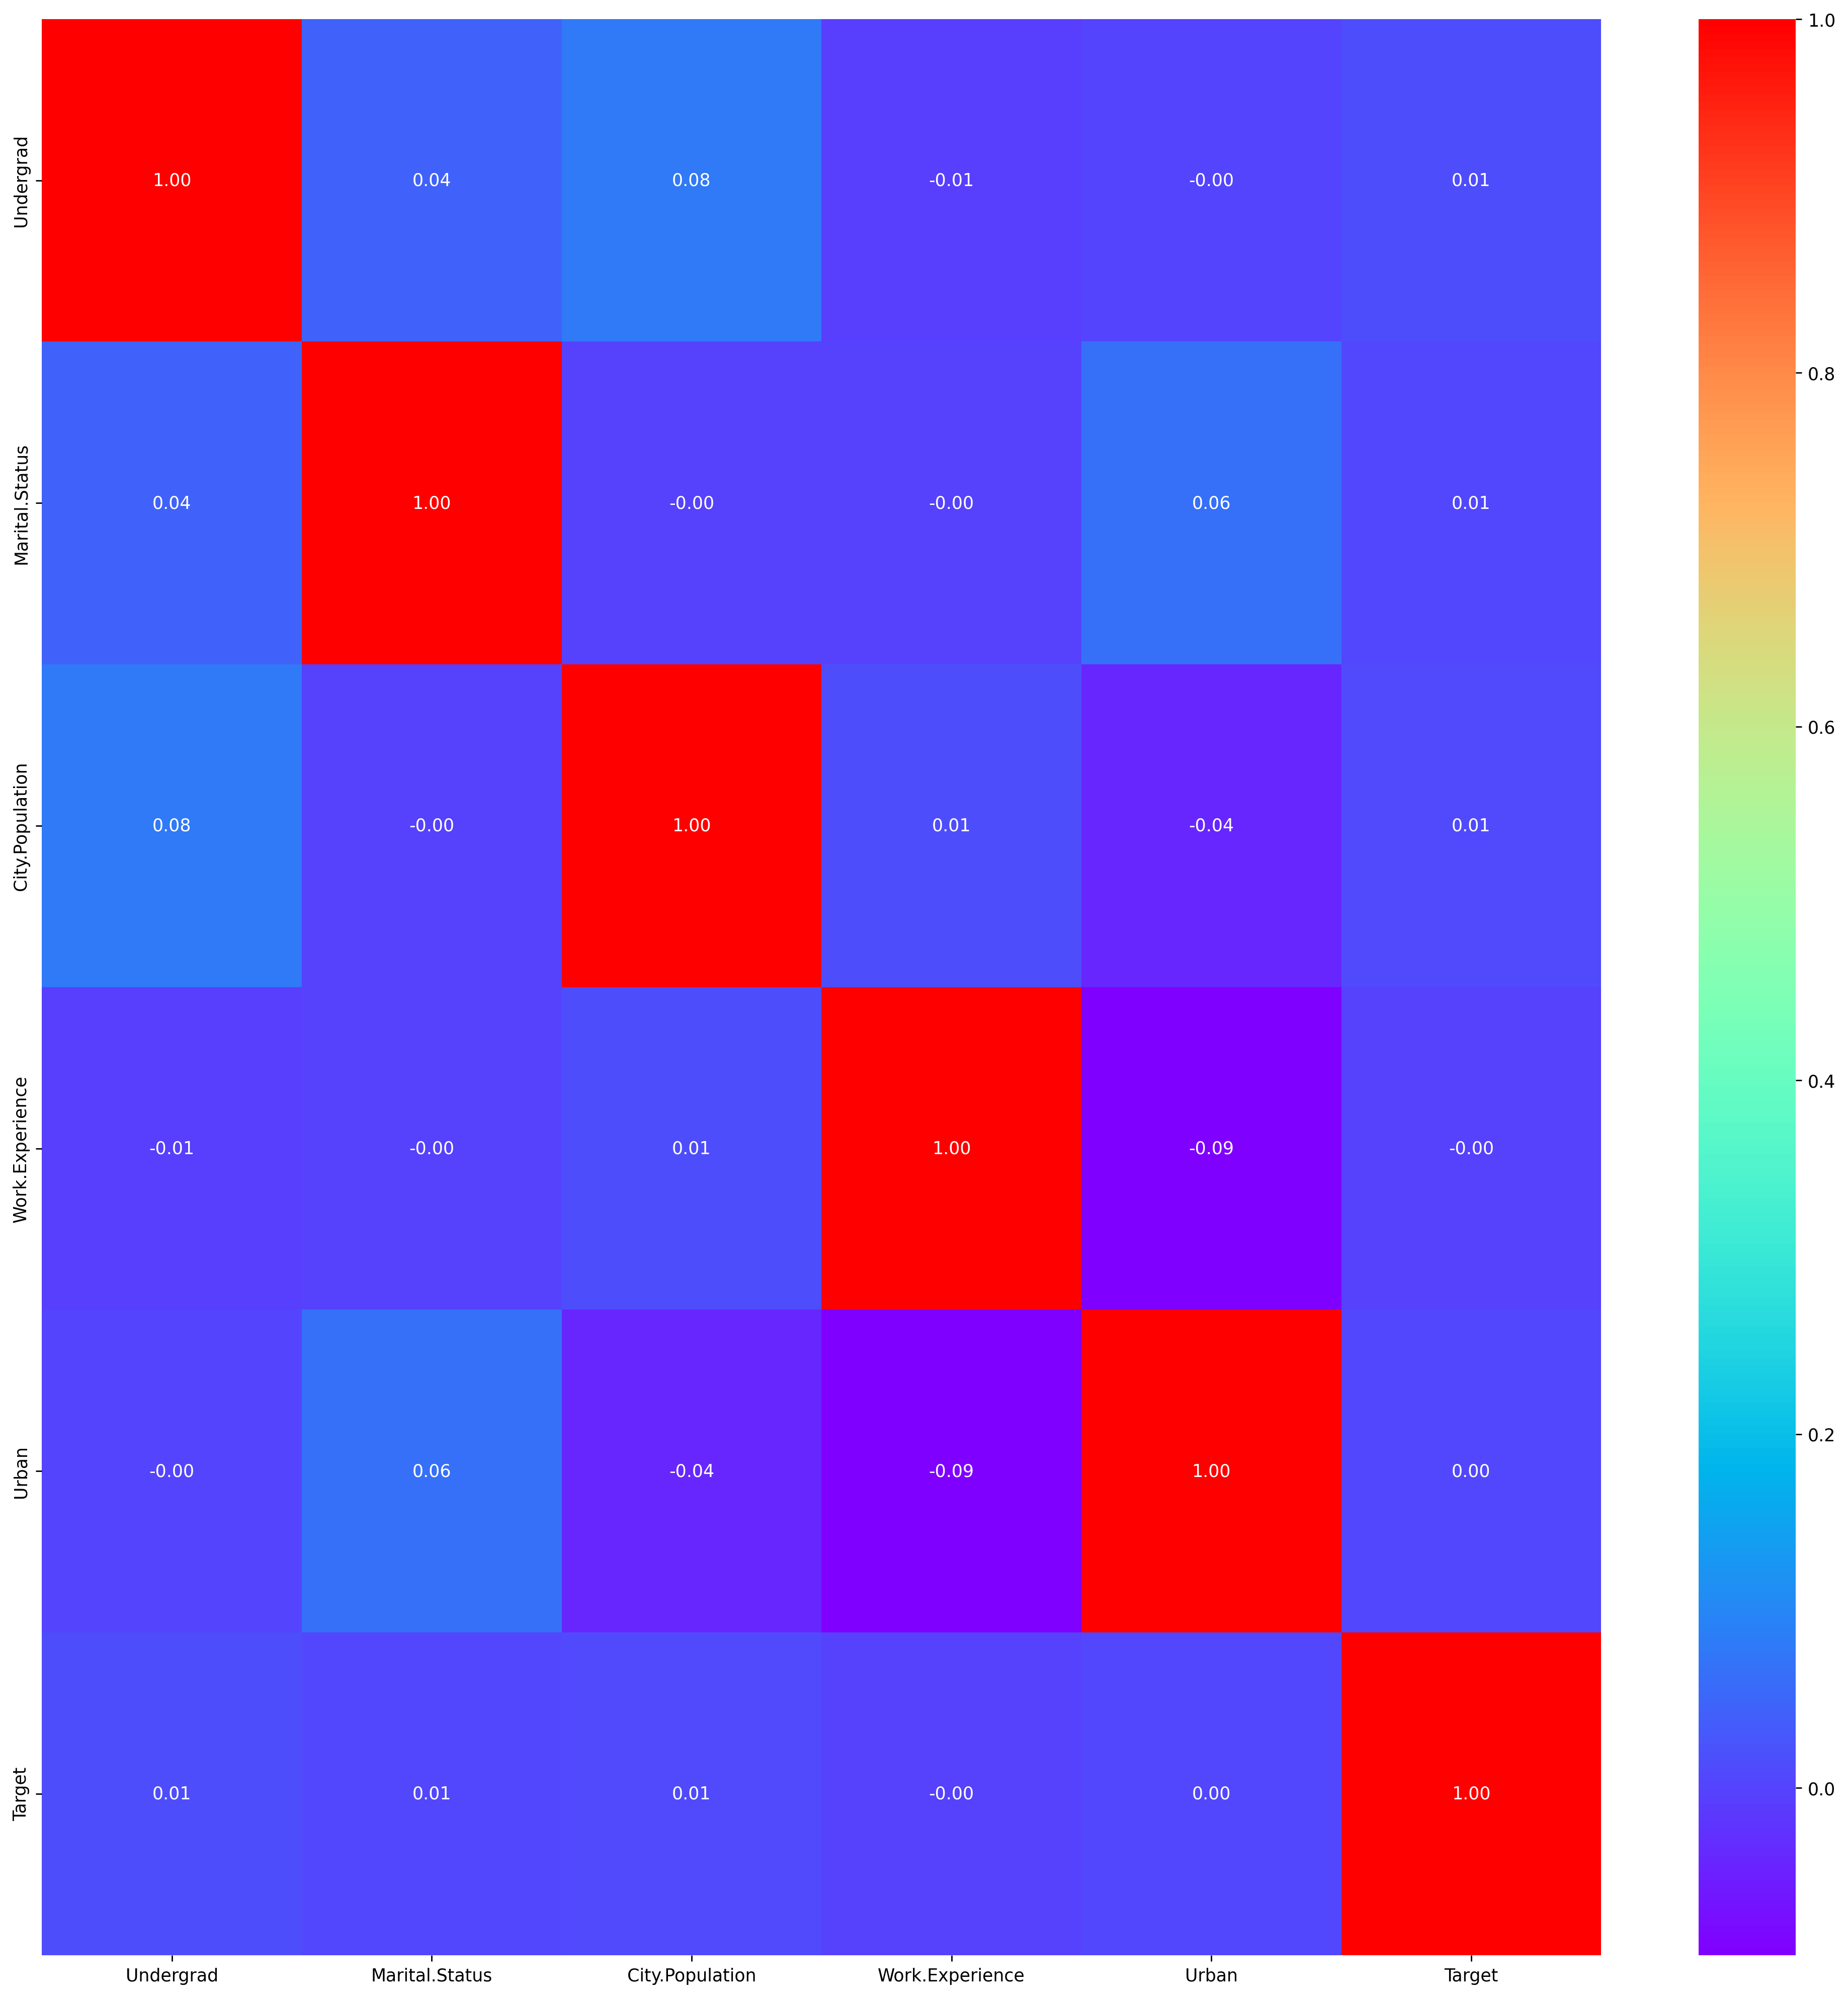

In [74]:
sns.heatmap(fraudC.corr(), cmap='rainbow', annot=True, fmt=".2f")

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

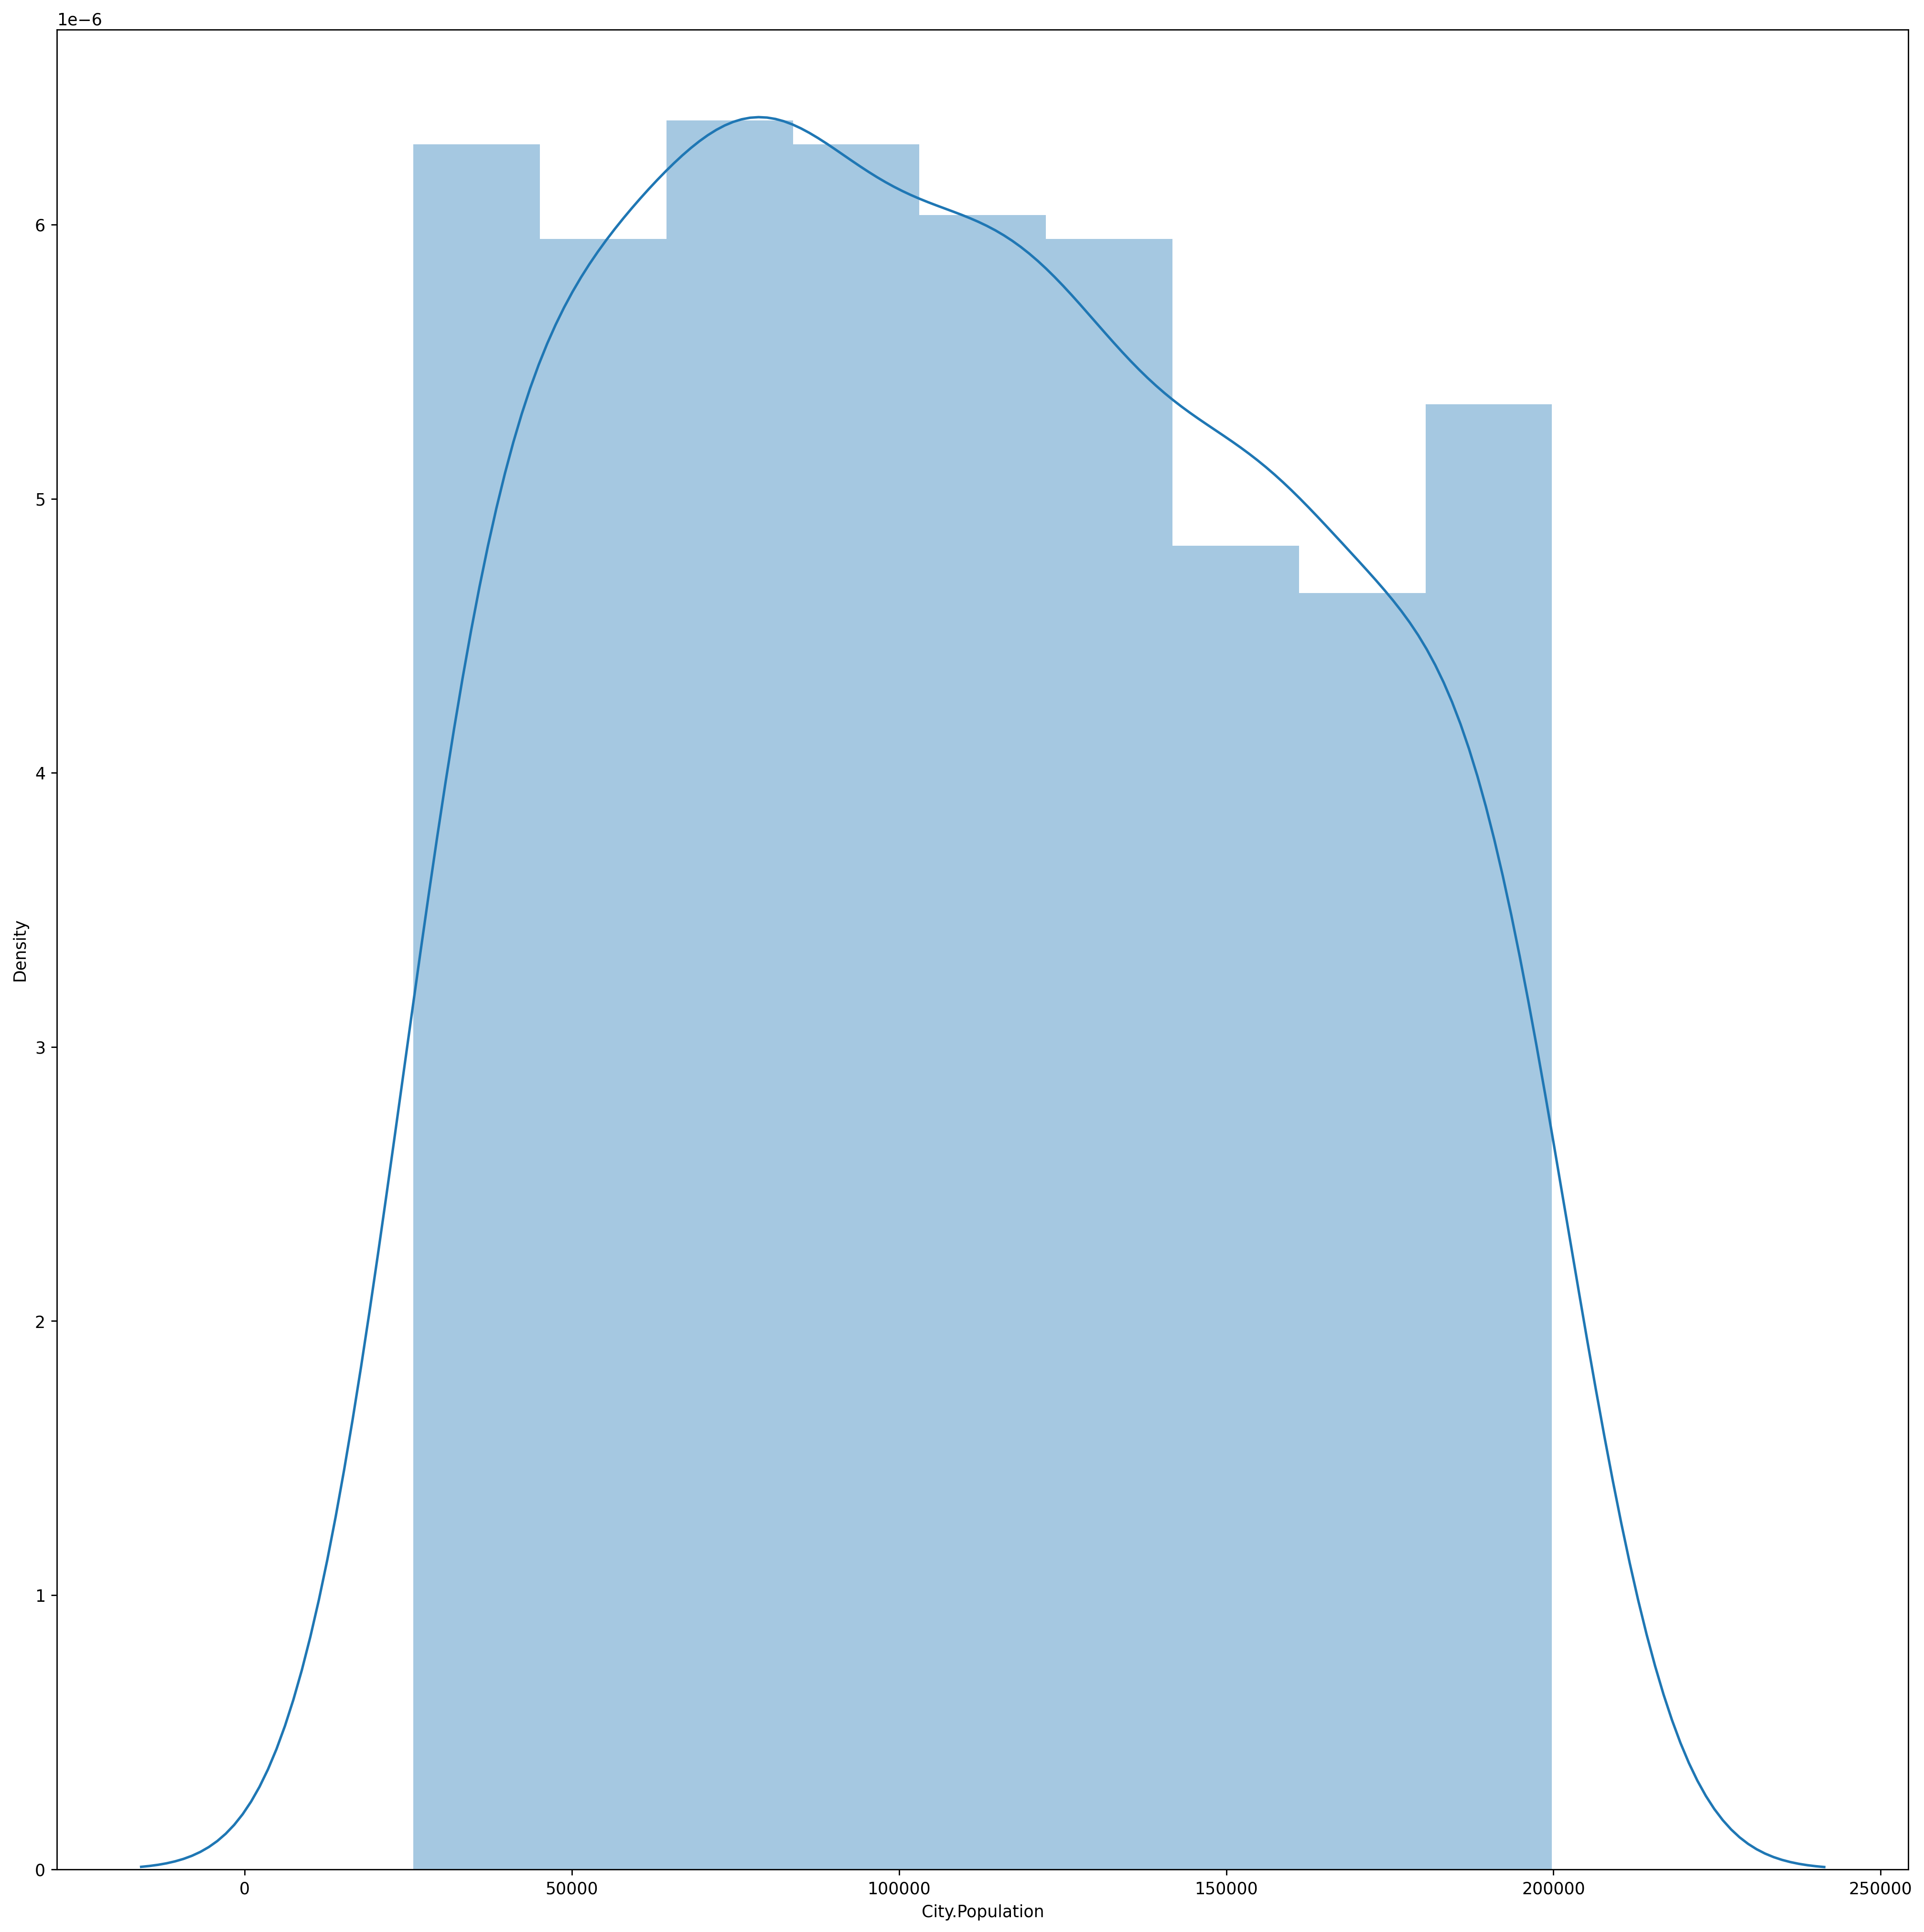

In [75]:
sns.distplot(fraudC['City.Population'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

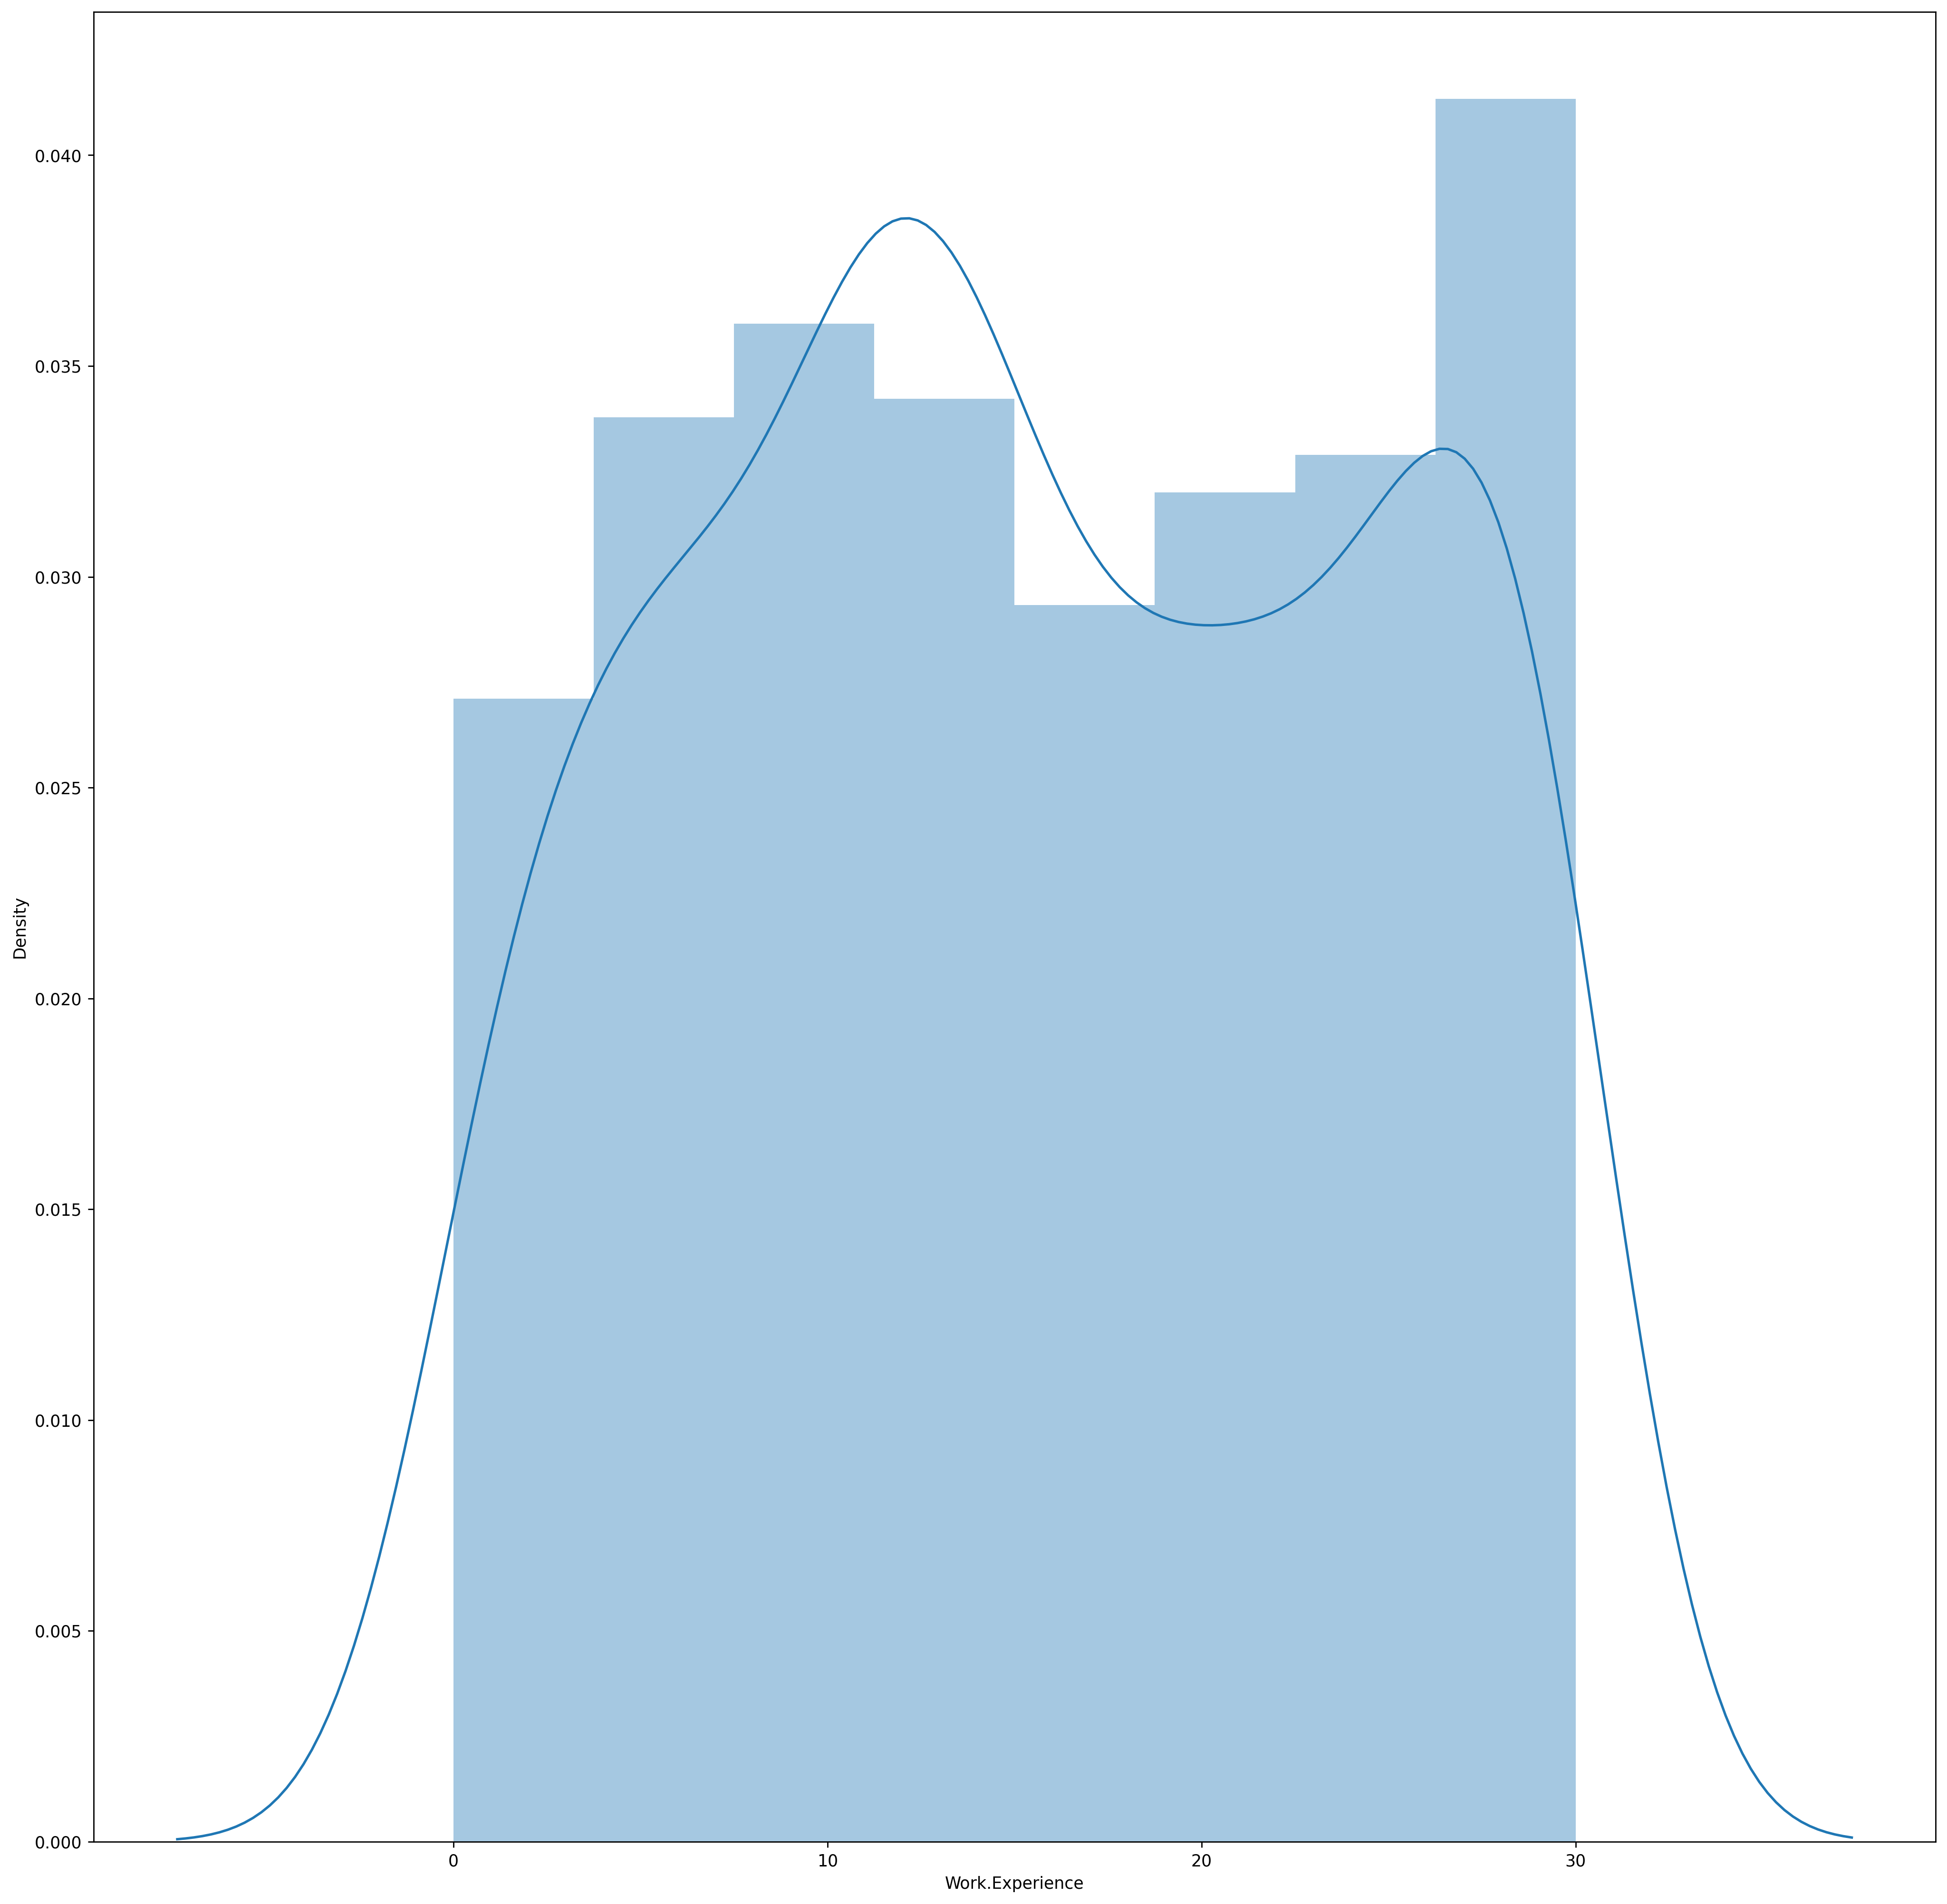

In [76]:
sns.distplot(fraudC['Work.Experience'])

<AxesSubplot:xlabel='City.Population', ylabel='Work.Experience'>

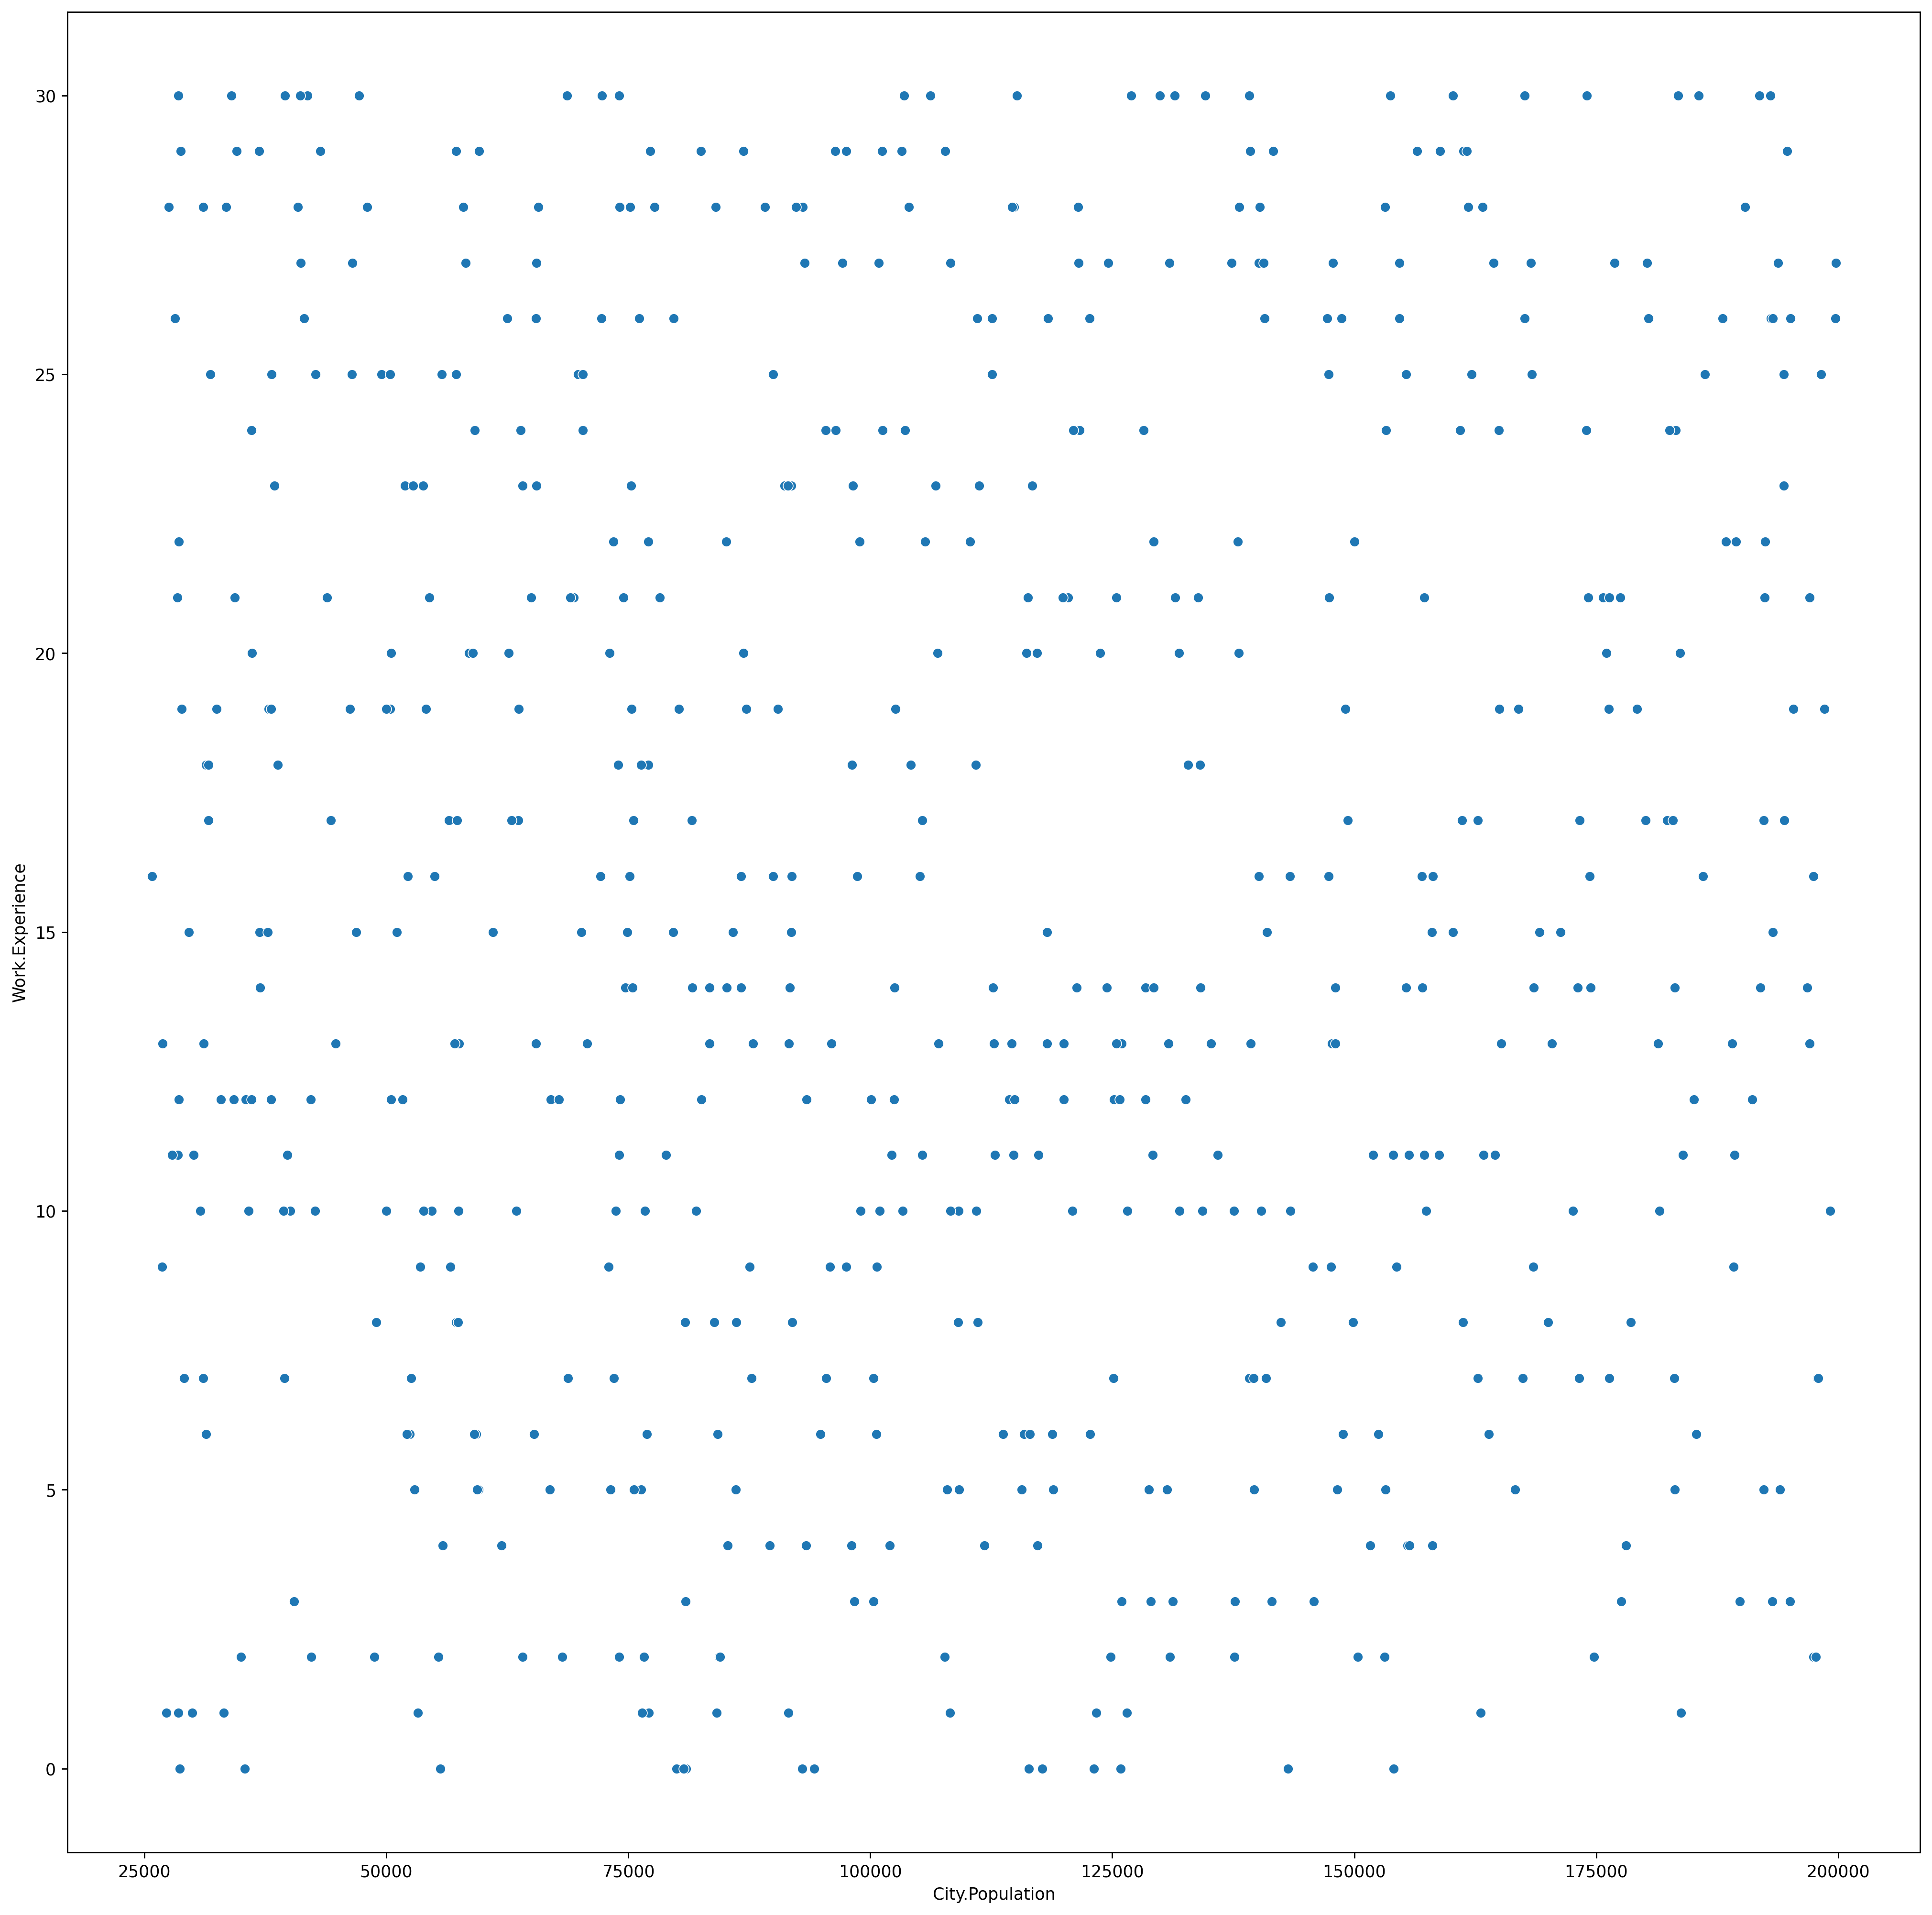

In [77]:
sns.scatterplot(x = 'City.Population', y = 'Work.Experience', data = fraudC)

In [78]:
x=fraudC.iloc[:,0:5]
y=fraudC['Target']
x

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrain

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
118          0               0           199174               10      0
362          1               0            75552               17      1
55           1               2            89965               16      1
90           0               0           101232               29      0
390          1               2            57324               17      0
..         ...             ...              ...              ...    ...
277          0               0           117364               11      0
9            1               0           155482                4      1
359          1               2           157299               11      0
192          1               1           126556               10      1
559          1               0           180424               26      0

[480 rows x 5 columns]

In [80]:
ytrain

118    1
362    1
55     1
90     0
390    0
      ..
277    0
9      0
359    0
192    0
559    0
Name: Target, Length: 480, dtype: int32

In [81]:
#DecisionTreeClassifier Using Gini Criteria

In [83]:
parameter={
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12,15,18]
    
}

In [84]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5)

In [85]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15,
                                       18],
                         'splitter': ['best', 'random']})

In [86]:
ypred=grid.predict(xtest)

In [87]:
grid.best_params_

{'max_depth': 1, 'splitter': 'random'}

In [88]:
grid.best_score_

0.79375

In [89]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, splitter='random')

In [90]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [91]:
confusion_matrix(ytest,ypred)

array([[95,  0],
       [25,  0]], dtype=int64)

In [92]:
pred_train = dt.predict(xtrain)

In [93]:
confusion_matrix(ytrain,pred_train)

array([[381,   0],
       [ 99,   0]], dtype=int64)

In [94]:
accuracy_score(ytrain,pred_train)

0.79375

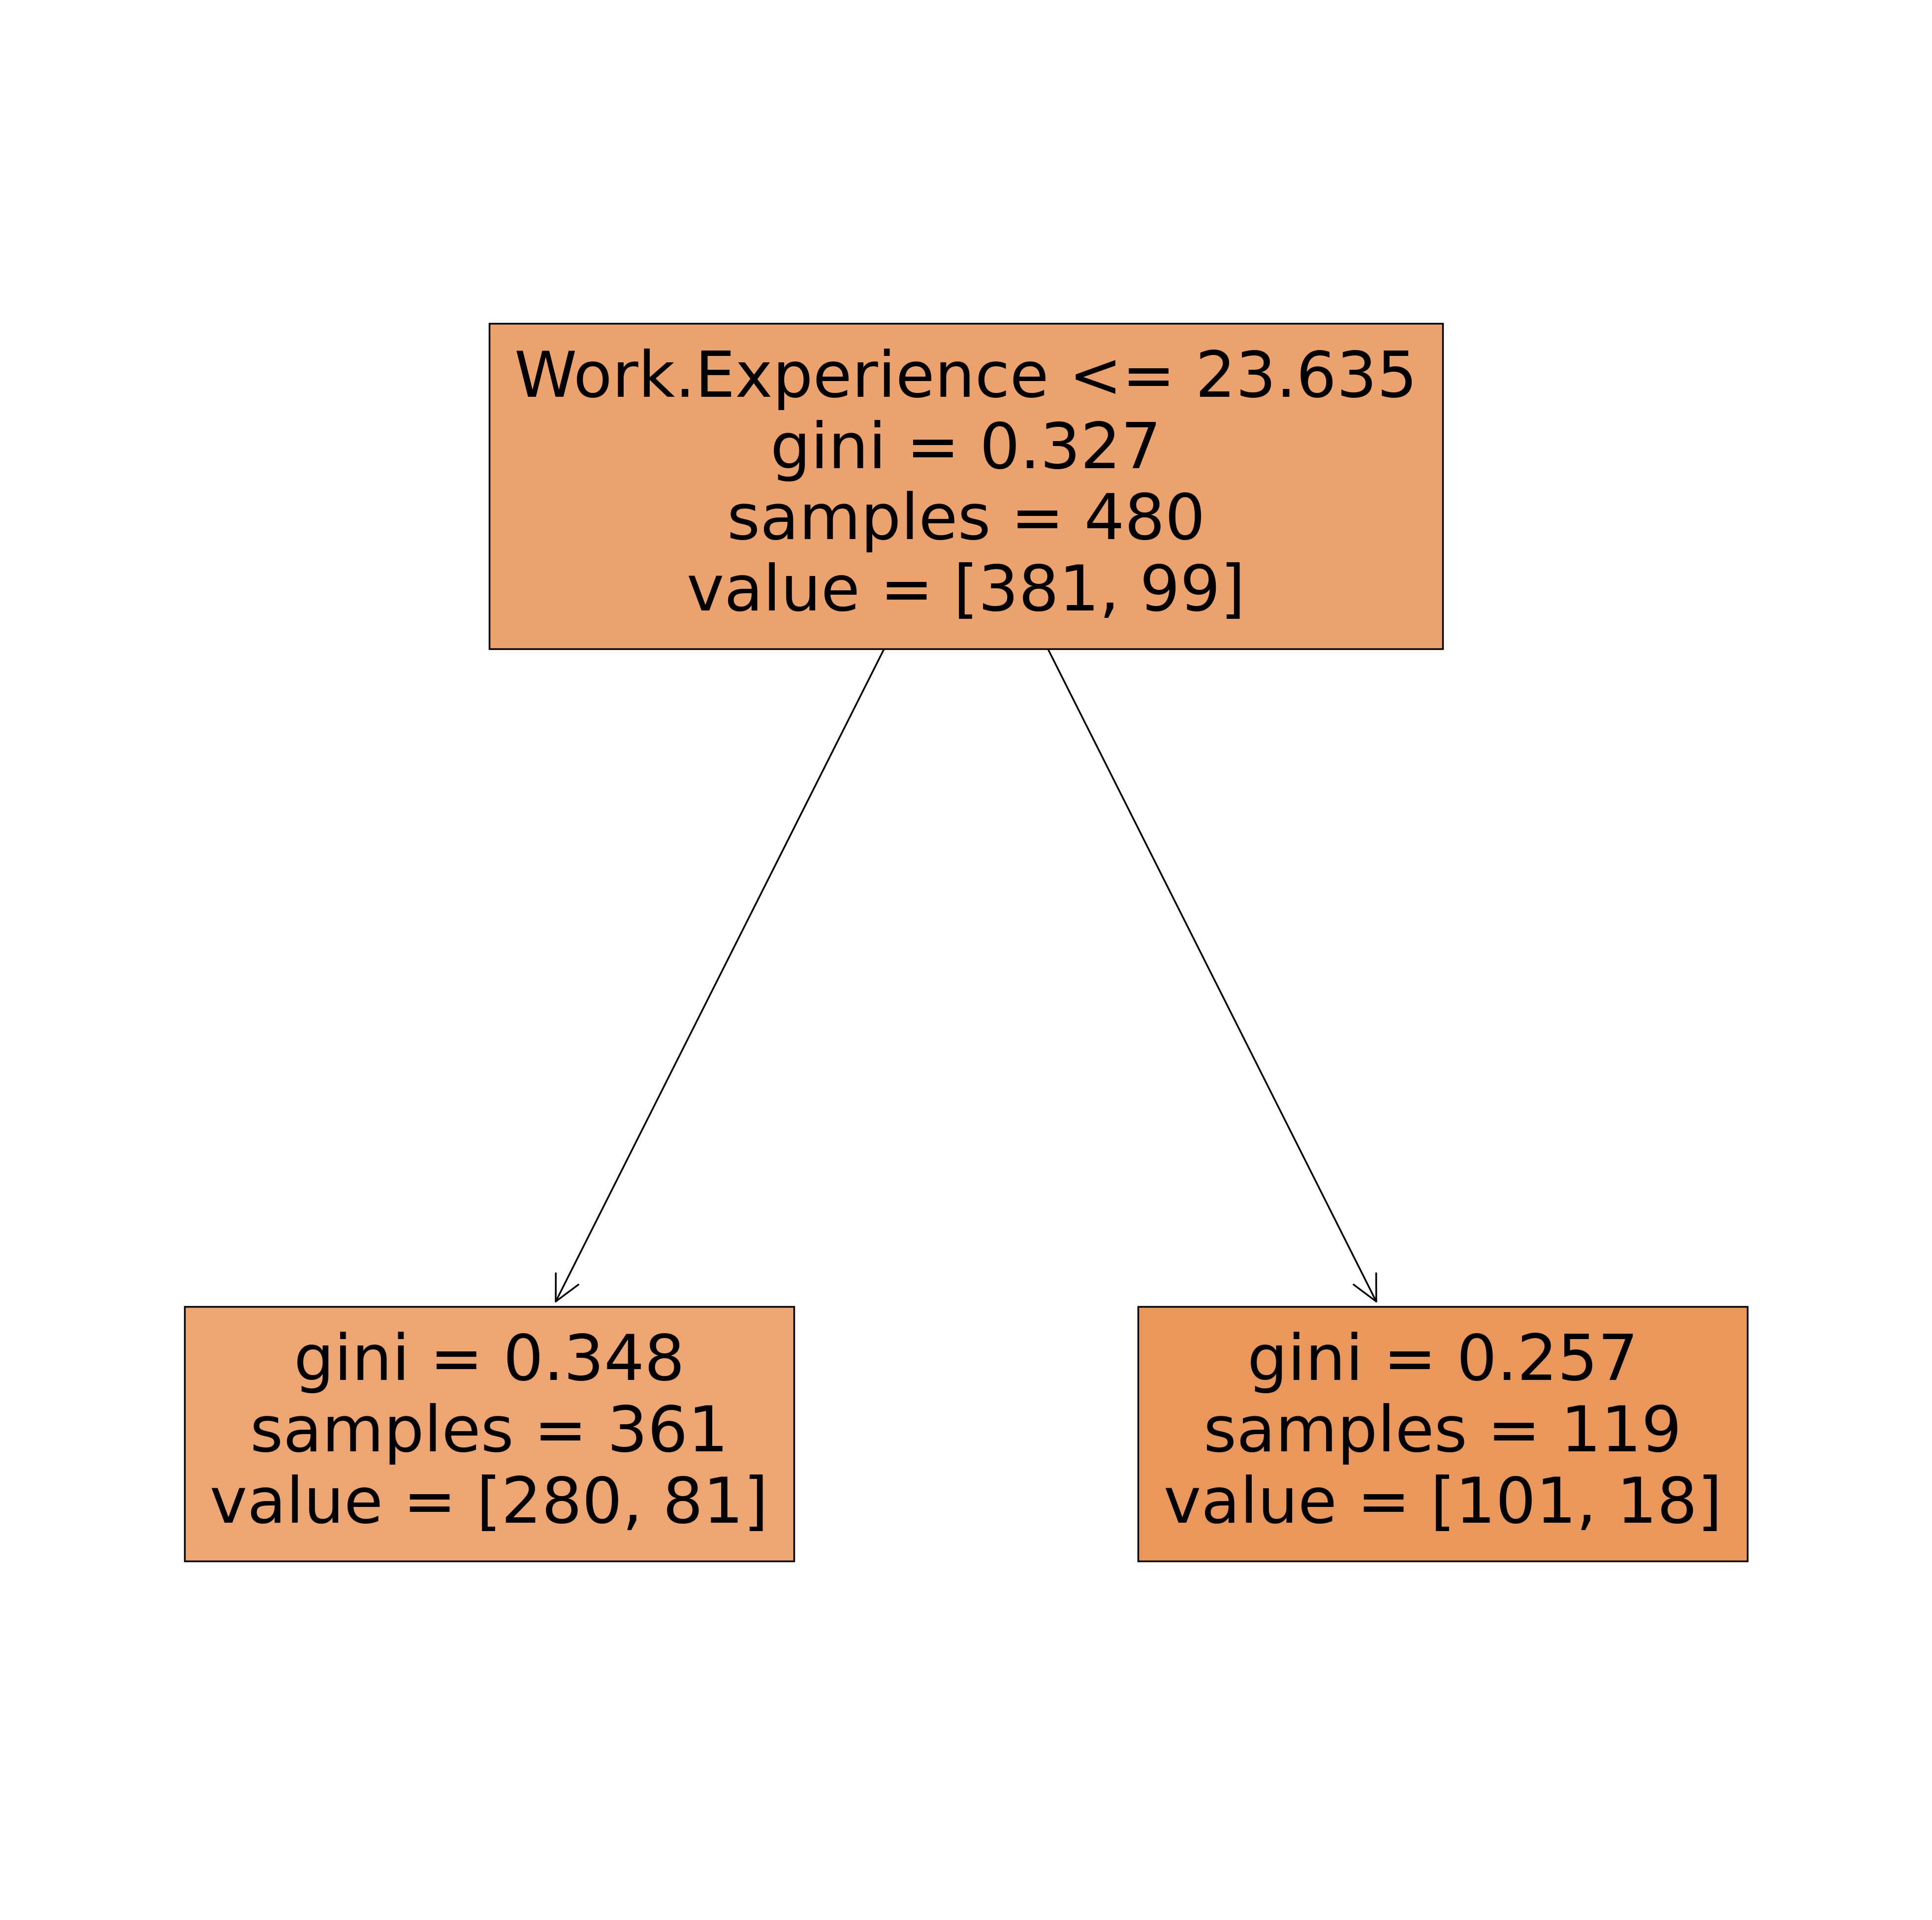

In [95]:
tree.plot_tree(dt, feature_names=x.columns,filled=True)
plt.show()

In [96]:
#Decision Tree Classifier using Entropy Criteria

In [97]:
parameter={
 'criterion':['entropy','gini'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12,15,18]
    
}

In [98]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5)

In [99]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15,
                                       18],
                         'splitter': ['best', 'random']})

In [100]:
ypred=grid.predict(xtest)

In [101]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}

In [102]:
grid.best_score_

0.79375

In [103]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='best')

In [104]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



In [105]:
confusion_matrix(ytest,ypred)

array([[95,  0],
       [25,  0]], dtype=int64)

In [106]:
pred_train = dt.predict(xtrain)

In [107]:
confusion_matrix(ytrain,pred_train)

array([[381,   0],
       [ 99,   0]], dtype=int64)

In [108]:
accuracy_score(ytrain,pred_train)

0.79375

In [109]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

In [110]:
print("Training Accuracy:", dt.score(xtrain,ytrain))
print("Testing Accuracy:" ,dt.score(xtest,ytest))

Training Accuracy: 0.79375
Testing Accuracy: 0.7916666666666666


In [111]:
fraudC1=pd.read_csv(r"Fraud_check.csv")
fraudC1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [112]:
y2=np.empty(600, dtype=object)
i=0

for value in fraudC1['Taxable.Income']:
    if value<=30000:
        y2[i]='Risky'
    else:
        y2[i]='Good'
    i=i+1    

In [113]:
f_t2=pd.DataFrame(y2,columns=["Target"])
fraudC1=pd.concat([fraudC1,f_t2],axis=1)

In [114]:
fraudC1.drop('Taxable.Income',inplace=True,axis=1)

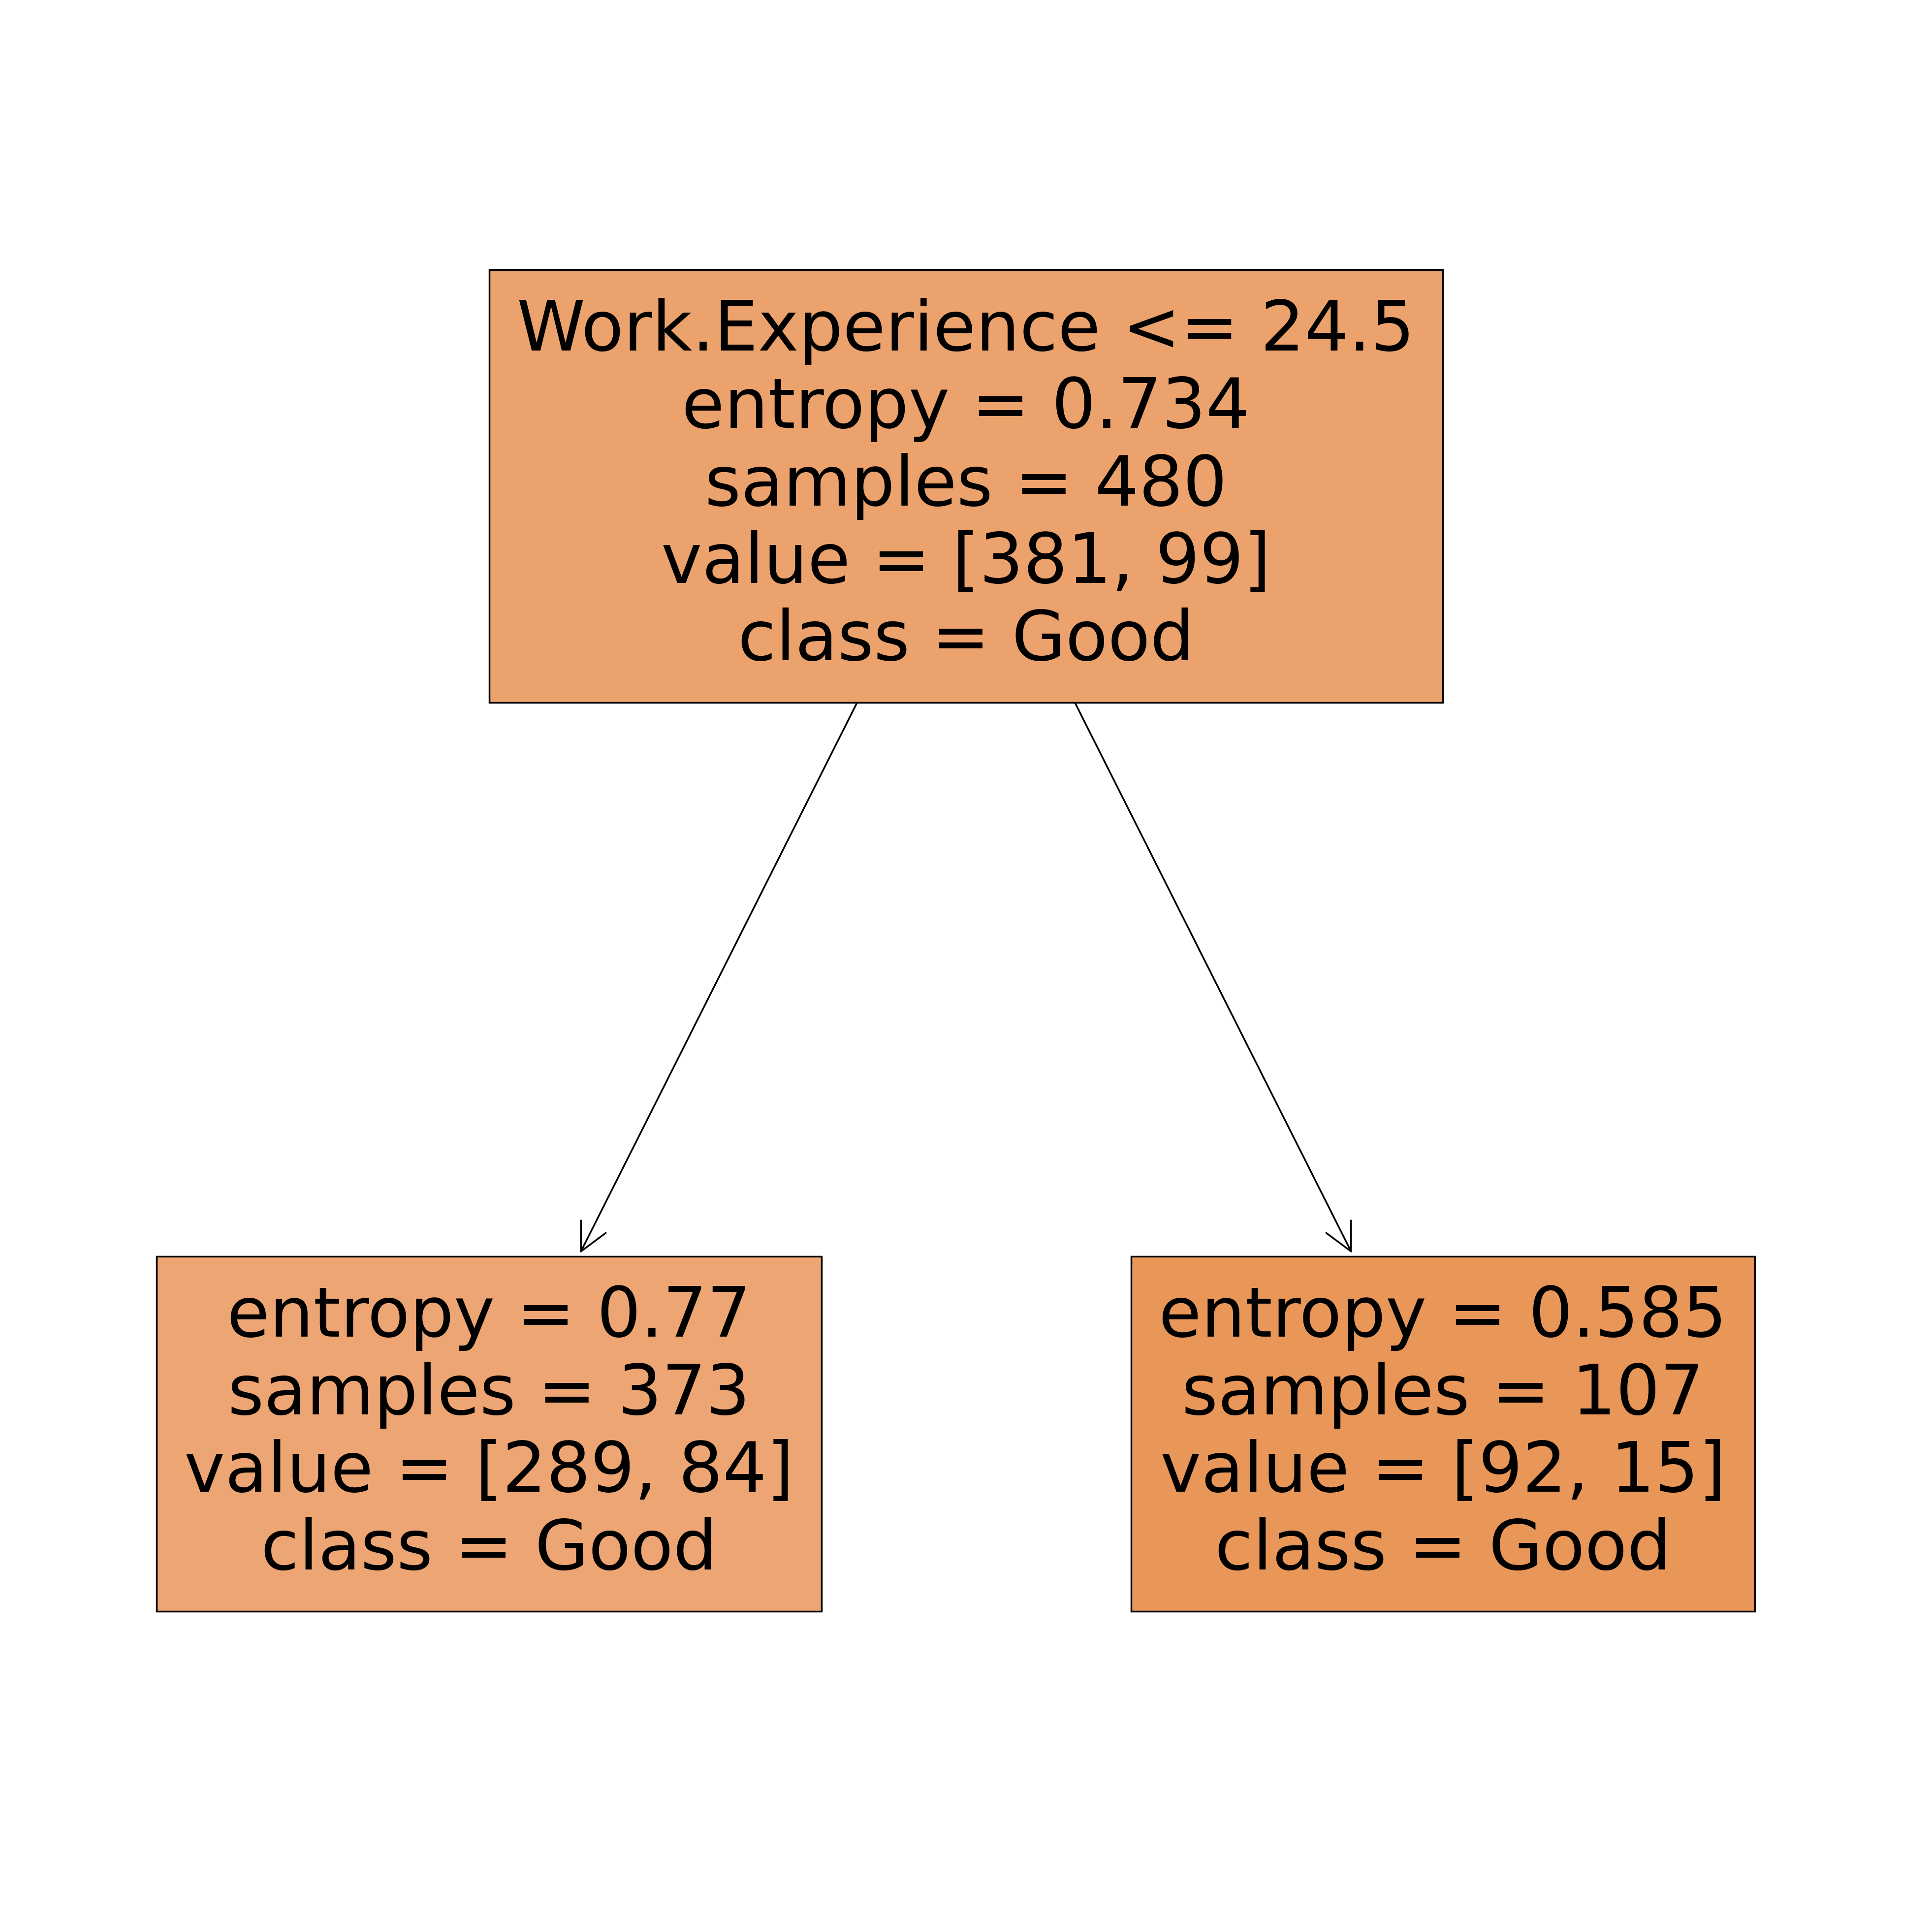

In [115]:
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=fraudC1['Target'].unique(),
              filled=True)
plt.show()